# IMPORT

In [ ]:
!pip install autocorrect
!pip install symspellpy jamo hangul_utils
!pip install transformers
!pip install preprocess
!pip install contractions
!pip install symspellpy
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=2b6e3bbf6a21de631d6ef51ab3553f9dd6c53cf818d6252002d6584be60598fb
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
Requested hangul_utils from https://files.pythonhosted.org/packages/b8/af/9e1beb71959c171d0dfbdd16e475a3ef45bc4bb4b5fd3d5816aad1c46c3c/hangul_utils-0.4.5-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    mecab-python (==0.996-ko-0.9.2)
                 ~~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested hangul_utils from https://files.pythonhosted.org/packages/26/cf/3347a5fa6512dc05a6b840a77fb6067ff89a87587d141959b80c26518208/hangul_utils-0.4.4-py3-none-any.whl has invalid met

In [ ]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pickle import dump, load
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import warnings
import matplotlib.dates as mdates

# Ignore warnings
warnings.filterwarnings("ignore")

# NLTK and other libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import requests
import contractions
import spacy
import tqdm

# Additional imports
import transformers
from transformers import BertTokenizer, BertModel, get_linear_schedule_with_warmup

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Set up matplotlib date formatter
import matplotlib.dates as mdates


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install --upgrade tensorflow


In [ ]:
# Importing libraries
#import shap
import tensorflow as tf
import os
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print(tf.__version__)



import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import tensorflow as tf
from dateutil import parser

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
#import shap
from matplotlib import pyplot
import csv
from datetime import datetime
#import keras_tuner

sns.set_style("dark")
plt.style.use("dark_background")
plt.rcParams['figure.facecolor'] = '#151934'
plt.rcParams['axes.facecolor'] = '#151934'
plt.rcParams.update({'axes.facecolor': '#151934'})
sns.set_palette('pastel')
sns.set_context('talk')
import pandas as pd
# Parse dates and set date column to index

import datetime
from datetime import date, time

# Create a function to plot time series data
def plot_time_series(timesteps, values, format='-', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("DJIA Stock Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


import tensorflow as tf

def evaluate_preds(y_true, y_pred):
    # Ensure input tensors are of type float32
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Instantiate metrics
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

    # Calculate metrics using update_state and result methods
    mae_metric.update_state(y_true, y_pred)
    mae = mae_metric.result().numpy()

    mse_metric.update_state(y_true, y_pred)
    mse = mse_metric.result().numpy()

    rmse = tf.sqrt(mse).numpy()

    mape_metric.update_state(y_true, y_pred)
    mape = mape_metric.result().numpy()

    mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

    return {
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "mape": mape,
        "mase": mase
    }

# Example use
# naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
# naive_results



2.17.0


# FILE PATH

In [ ]:
file_path = "/content/upload_DJIA_table (1).csv"


df = pd.read_csv(file_path,
                  parse_dates=["Date"],
                  index_col=["Date"],
                   thousands=',') # parse the date column (tell pandas column 1 is a datetime)


#df = pd.read_csv(file_path,
                  #thousands=',') # parse the date column (tell pandas column 1 is a datetime)

df = df[::-1]


In [ ]:
df_c =df.tail(3)
df_c

Open          High           Low         Close     Volume  \
Date                                                                            
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688  106380000   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234  133030000   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   82160000   

               Adj Close  
Date                      
2016-06-29  17694.679688  
2016-06-30  17929.990234  
2016-07-01  17949.369141

In [ ]:
df = df[["Open", "High","Low", "Close","Volume", "Adj Close"]]

df['EMA'] = df['Close'].ewm(com=0.5).mean()
df['MA7'] = df['Close'].rolling(window=7).mean() #Close column
#df['MA20'] = df['Price'].rolling(window=20).mean() #Close Column


#Drop NaN Values
df = df.dropna()
df

Open          High           Low         Close     Volume  \
Date                                                                            
2008-08-18  11659.650391  11690.429688  11434.120117  11479.389648  156290000   
2008-08-19  11478.089844  11478.169922  11318.500000  11348.549805  171580000   
2008-08-20  11345.940430  11454.150391  11290.580078  11417.429688  144880000   
2008-08-21  11415.230469  11476.209961  11315.570312  11430.209961  130020000   
2008-08-22  11426.790039  11632.129883  11426.790039  11628.059570  138790000   
...                  ...           ...           ...           ...        ...   
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234  138740000   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703  112190000   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688  106380000   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234  133030000   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   82160000   

               Adj Close           EMA           MA7  
Date                                                  
2008-08-18  11479.389648  11533.371152  11635.331334  
2008-08-19  11348.549805  11410.138138  11580.221261  
2008-08-20  11417.429688  11414.999418  11528.089844  
2008-08-21  11430.209961  11425.139952  11497.767020  
2008-08-22  11628.059570  11560.420461  11511.352679  
...                  ...           ...           ...  
2016-06-27  17140.240234  17286.702282  17663.235770  
2016-06-28  17409.720703  17368.714563  17625.315848  
2016-06-29  17694.679688  17586.024646  17609.574498  
2016-06-30  17929.990234  17815.335038  17623.897321  
2016-07-01  17949.369141  17904.691107  17647.974330  

[1983 rows x 8 columns]

In [ ]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Print the count of null values for each column
print(null_values)


Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
EMA          0
MA7          0
dtype: int64


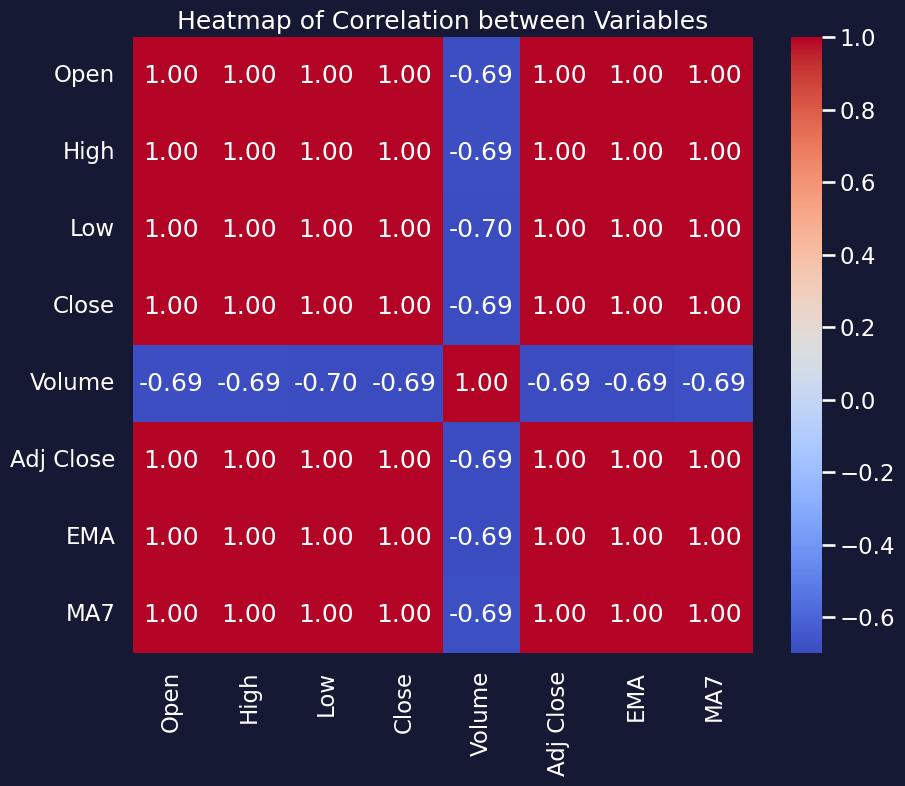

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the heatmap
plt.title('Heatmap of Correlation between Variables')

# Show the heatmap
plt.show()


In [ ]:
# Only want closing price for each day
prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
prices.head()

Price
Date                    
2008-08-18  11479.389648
2008-08-19  11348.549805
2008-08-20  11417.429688
2008-08-21  11430.209961
2008-08-22  11628.059570

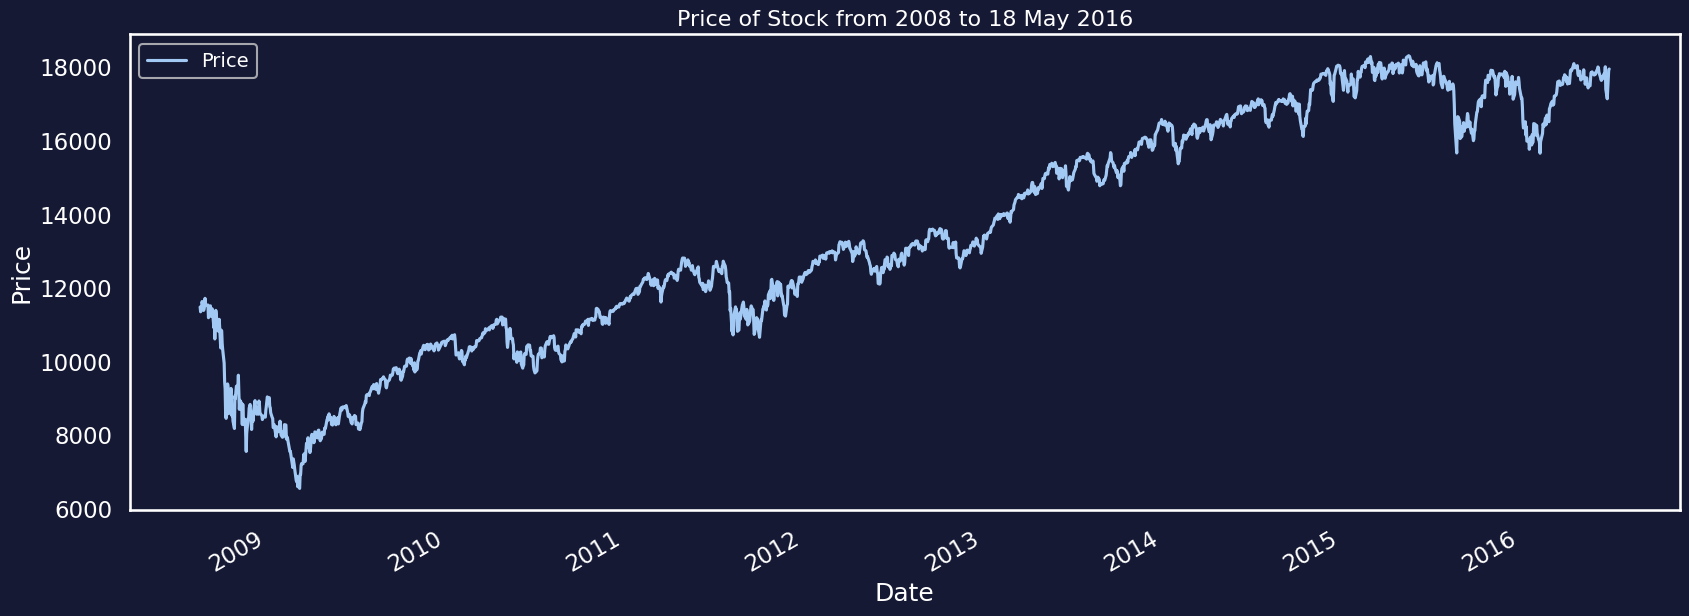

In [ ]:
import matplotlib.pyplot as plt
prices.plot(figsize=(20, 7))
plt.ylabel("Price")
plt.title("Price of Stock from 2008 to 18 May 2016", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
price = []
with open("/content/upload_DJIA_table (1).csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    price.append(float(line[4])) # get the closing price as float

# View first 10 of each

timesteps = timesteps[::-1]

price = price[::-1]
timesteps[:10], price[:10]

([datetime.datetime(2008, 8, 8, 0, 0),
  datetime.datetime(2008, 8, 11, 0, 0),
  datetime.datetime(2008, 8, 12, 0, 0),
  datetime.datetime(2008, 8, 13, 0, 0),
  datetime.datetime(2008, 8, 14, 0, 0),
  datetime.datetime(2008, 8, 15, 0, 0),
  datetime.datetime(2008, 8, 18, 0, 0),
  datetime.datetime(2008, 8, 19, 0, 0),
  datetime.datetime(2008, 8, 20, 0, 0),
  datetime.datetime(2008, 8, 21, 0, 0)],
 [11734.320312,
  11782.349609,
  11642.469727,
  11532.959961,
  11615.929688,
  11659.900391,
  11479.389648,
  11348.549805,
  11417.429688,
  11430.209961])

In [ ]:
# Get bitcoin date array
timesteps = prices.index.to_numpy()
prices = prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2008-08-18T00:00:00.000000000', '2008-08-19T00:00:00.000000000',
        '2008-08-20T00:00:00.000000000', '2008-08-21T00:00:00.000000000',
        '2008-08-22T00:00:00.000000000', '2008-08-25T00:00:00.000000000',
        '2008-08-26T00:00:00.000000000', '2008-08-27T00:00:00.000000000',
        '2008-08-28T00:00:00.000000000', '2008-08-29T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([11479.389648, 11348.549805, 11417.429688, 11430.209961,
        11628.05957 , 11386.25    , 11412.870117, 11502.509766,
        11715.179688, 11543.959961]))

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1586, 397, 1586, 397)

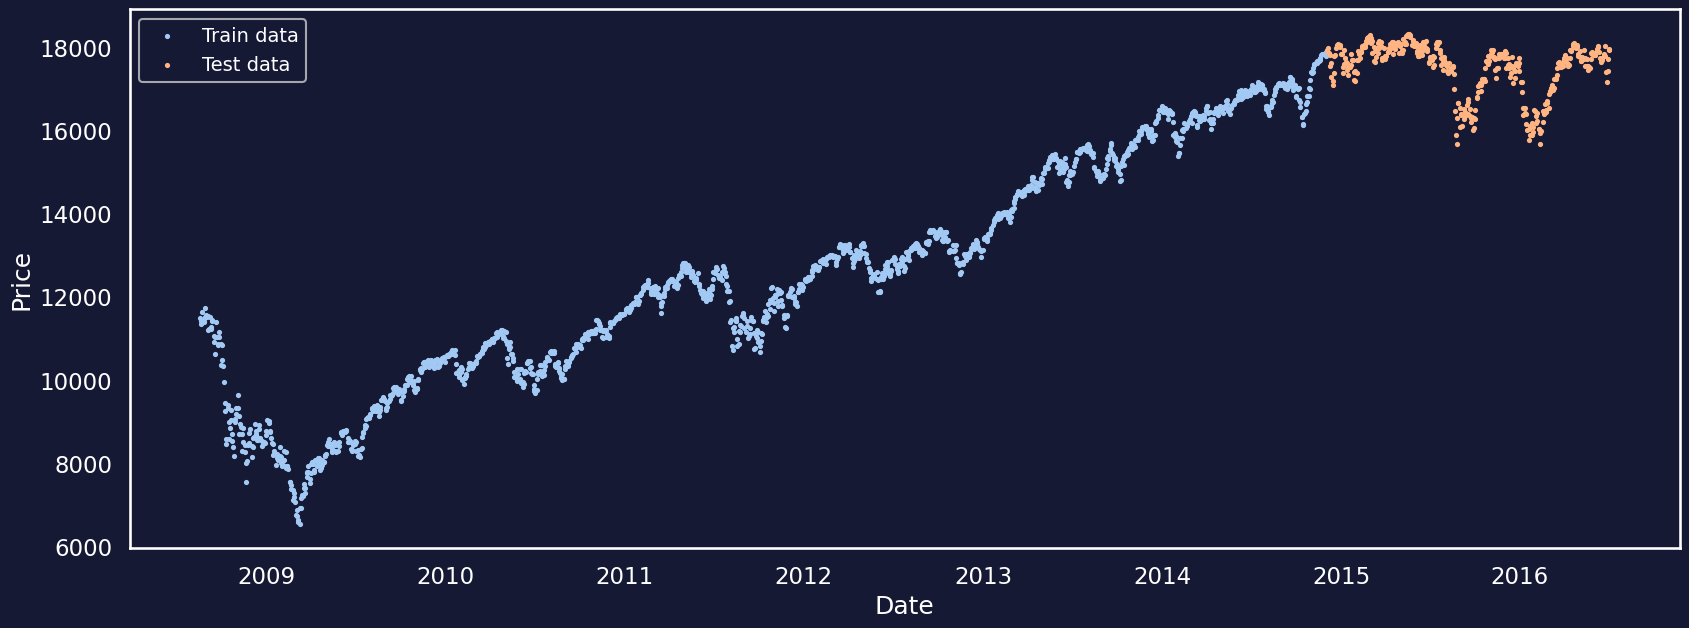

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(20, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("DJIA Stock Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

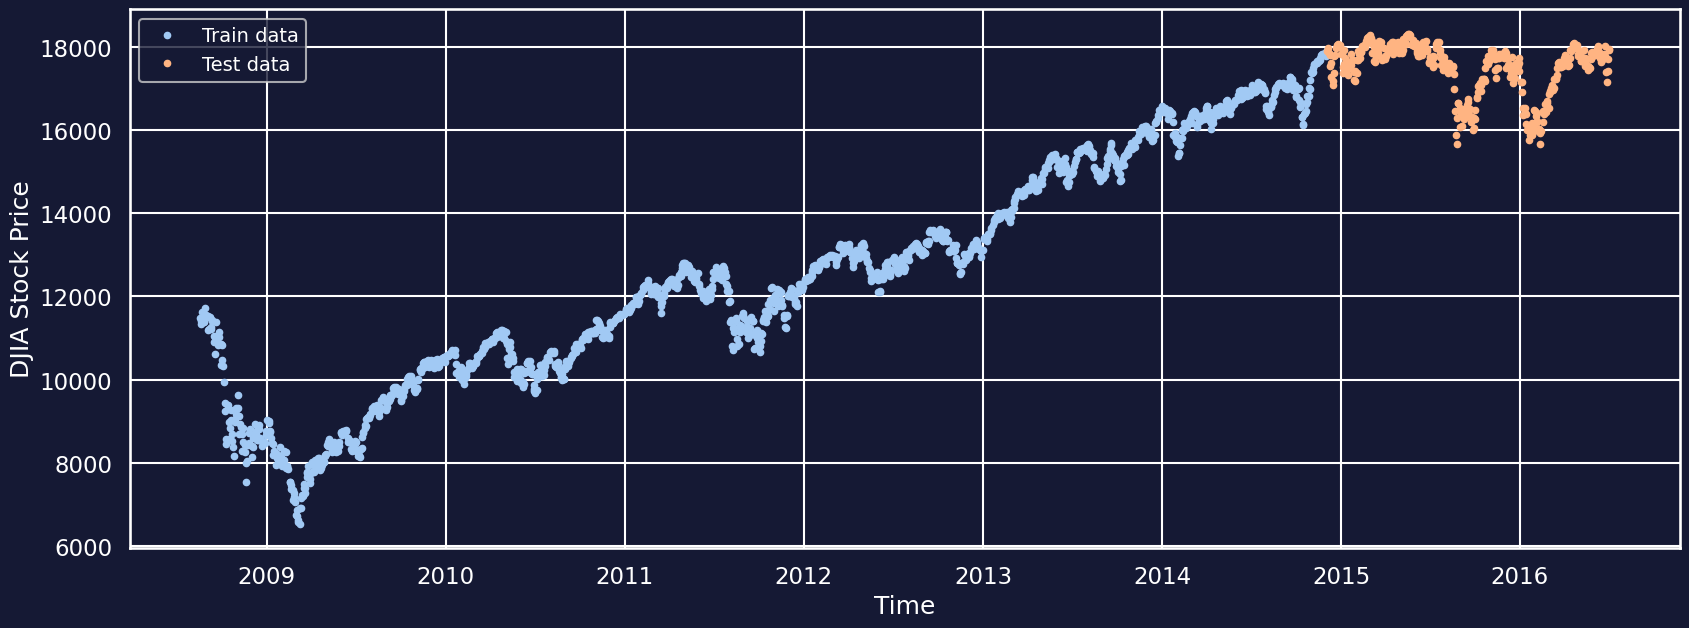

In [ ]:
# Try out our plotting function
plt.figure(figsize=(20, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([17900.099609, 17958.789062, 17852.480469, 17801.199219,
        17533.150391, 17596.339844, 17280.830078, 17180.839844,
        17068.869141, 17356.869141]),
 array([17675.160156, 17804.869141, 17829.730469, 17780.830078,
        18011.070312, 17400.75    , 17140.240234, 17409.720703,
        17694.679688, 17929.990234]))

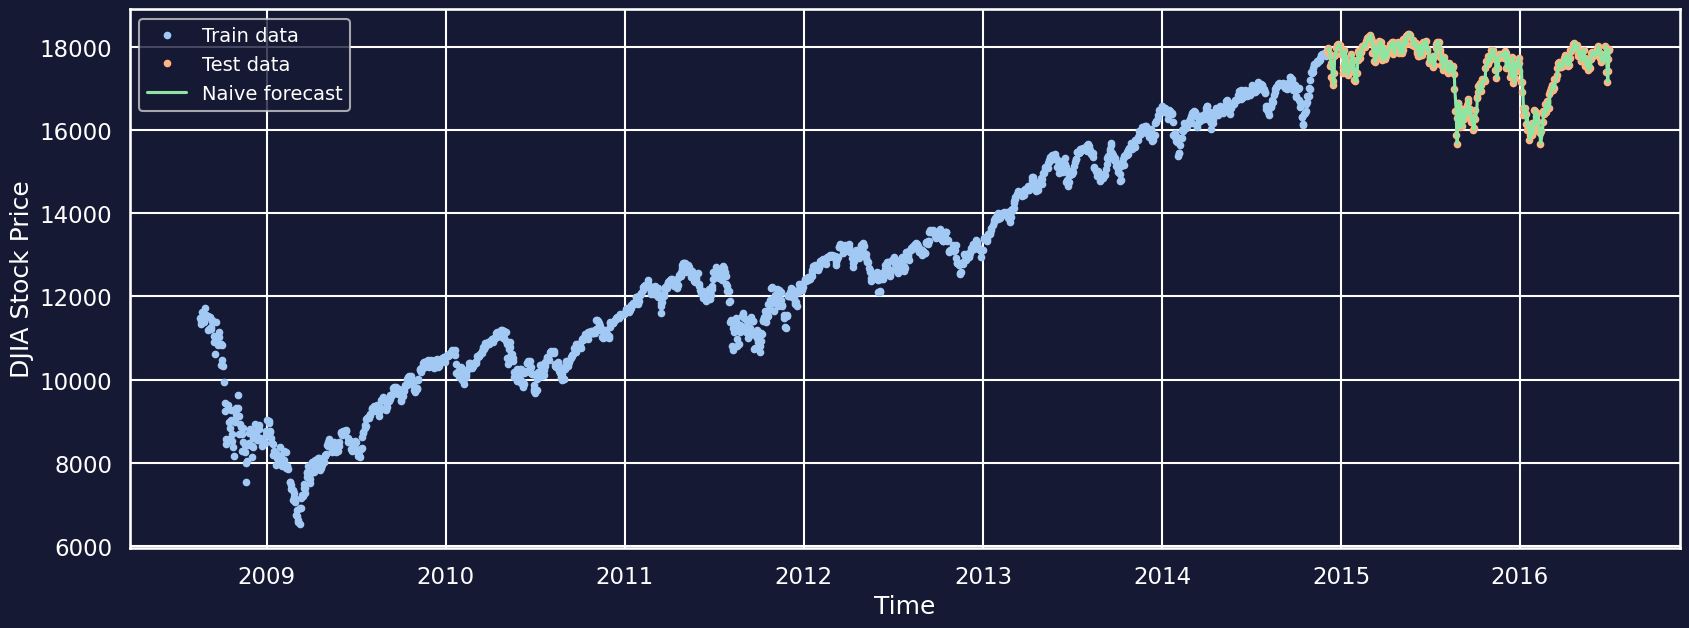

In [ ]:
# Plot naive forecast
plt.figure(figsize=(20, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

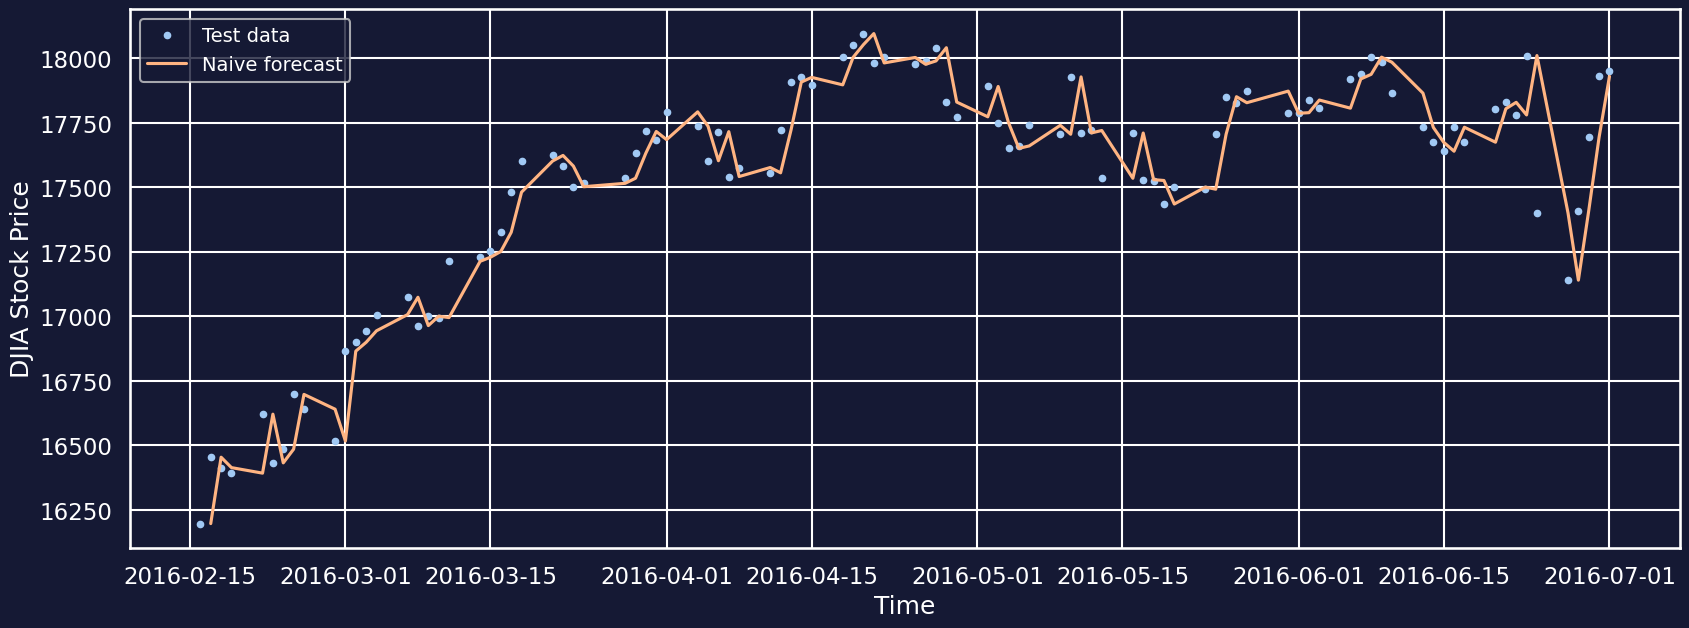

In [ ]:
plt.figure(figsize=(20, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [ ]:
# Example use
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 125.68157,
 'mse': 27671.523,
 'rmse': 166.3476,
 'mape': 0.7280941,
 'mase': 0.9986524}

In [ ]:
# Find average price in test dataset
tf.reduce_mean(y_test).numpy()

17481.718676214106

In [ ]:
df = df[["Open", "High","Low", "Close"]]

df['EMA'] = df['Close'].ewm(com=0.5).mean()
df['MA7'] = df['Close'].rolling(window=7).mean() #Close column
#df['MA20'] = df['Price'].rolling(window=20).mean() #Close Column


#Drop NaN Values
df = df.dropna()
df

Open          High           Low         Close  \
Date                                                                 
2008-08-26  11383.559570  11436.240234  11340.410156  11412.870117   
2008-08-27  11412.459961  11554.459961  11381.769531  11502.509766   
2008-08-28  11499.870117  11715.179688  11499.790039  11715.179688   
2008-08-29  11713.230469  11713.230469  11543.389648  11543.959961   
2008-09-02  11545.629883  11790.169922  11471.900391  11516.919922   
...                  ...           ...           ...           ...   
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   

                     EMA           MA7  
Date                                    
2008-08-26  11423.249282  11443.251256  
2008-08-27  11476.097660  11446.554130  
2008-08-28  11635.493777  11498.929827  
2008-08-29  11574.470199  11517.005580  
2008-09-02  11536.103131  11529.392718  
...                  ...           ...  
2016-06-27  17286.702282  17663.235770  
2016-06-28  17368.714563  17625.315848  
2016-06-29  17586.024646  17609.574498  
2016-06-30  17815.335038  17623.897321  
2016-07-01  17904.691107  17647.974330  

[1977 rows x 6 columns]

In [ ]:
df_1 = df
WINDOW_SIZE = 1
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = df_1.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Close+{i+1}"] = bitcoin_prices_windowed["Close"].shift(periods=i+1)
bitcoin_prices_windowed = bitcoin_prices_windowed.dropna()
#bitcoin_prices_windowed[f"c+{-1}"] = bitcoin_prices_windowed["c"].shift(periods=-1)

#Close

bitcoin_prices_windowed[f"Close	+{-1}"] = bitcoin_prices_windowed["Close"].shift(periods=-1)
bitcoin_prices_windowed.rename(columns={'Close\t+-1': 'Close Price'}, inplace=True)

#bitcoin_prices_windowed.rename(columns={'c+-1': 'Close'}, inplace=True)

In [ ]:
bitcoin_prices_windowed.head(5)

Open          High           Low         Close  \
Date                                                                 
2008-08-27  11412.459961  11554.459961  11381.769531  11502.509766   
2008-08-28  11499.870117  11715.179688  11499.790039  11715.179688   
2008-08-29  11713.230469  11713.230469  11543.389648  11543.959961   
2008-09-02  11545.629883  11790.169922  11471.900391  11516.919922   
2008-09-03  11506.009766  11554.379883  11416.530273  11532.879883   

                     EMA           MA7       Close+1   Close Price  
Date                                                                
2008-08-27  11476.097660  11446.554130  11412.870117  11715.179688  
2008-08-28  11635.493777  11498.929827  11502.509766  11543.959961  
2008-08-29  11574.470199  11517.005580  11715.179688  11516.919922  
2008-09-02  11536.103131  11529.392718  11543.959961  11532.879883  
2008-09-03  11533.954295  11515.795620  11516.919922  11188.230469

In [ ]:
bitcoin_prices_windowed.tail(5)

Open          High           Low         Close  \
Date                                                                 
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   

                     EMA           MA7       Close+1   Close Price  
Date                                                                
2016-06-27  17286.702282  17663.235770  17400.750000  17409.720703  
2016-06-28  17368.714563  17625.315848  17140.240234  17694.679688  
2016-06-29  17586.024646  17609.574498  17409.720703  17929.990234  
2016-06-30  17815.335038  17623.897321  17694.679688  17949.369141  
2016-07-01  17904.691107  17647.974330  17929.990234           NaN

In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Close Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Close Price"].astype(np.float32)
X.head()


Open          High           Low         Close  \
Date                                                                 
2008-08-27  11412.459961  11554.459961  11381.769531  11502.509766   
2008-08-28  11499.870117  11715.179688  11499.790039  11715.179688   
2008-08-29  11713.230469  11713.230469  11543.389648  11543.959961   
2008-09-02  11545.629883  11790.169922  11471.900391  11516.919922   
2008-09-03  11506.009766  11554.379883  11416.530273  11532.879883   

                     EMA           MA7       Close+1  
Date                                                  
2008-08-27  11476.097656  11446.553711  11412.870117  
2008-08-28  11635.494141  11498.929688  11502.509766  
2008-08-29  11574.469727  11517.005859  11715.179688  
2008-09-02  11536.103516  11529.392578  11543.959961  
2008-09-03  11533.954102  11515.795898  11516.919922

In [ ]:
y.head(5)

Date
2008-08-27    11715.179688
2008-08-28    11543.959961
2008-08-29    11516.919922
2008-09-02    11532.879883
2008-09-03    11188.230469
Name: Close Price, dtype: float32

In [ ]:

split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(1580, 1580, 395, 395)

# Keras Sequential Model

In [ ]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 63224592.0000 - mae: 6875.2661 - val_loss: 142281.0938 - val_mae: 355.7242
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52793.7656 - mae: 171.9136 - val_loss: 15957.4688 - val_mae: 99.5293
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25223.0195 - mae: 110.9823 - val_loss: 15570.6504 - val_mae: 94.2998
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25571.4238 - mae: 112.8620 - val_loss: 15611.8184 - val_mae: 94.3314
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26373.3438 - mae: 117.4554 - val_loss: 17038.7793 - val_mae: 97.3371
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25792.3516 - mae: 115.3072 - val_loss: 15824.3291 - val_mae: 94.5765
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25462.9414 - mae: 114.0917 - val_loss: 15923.4209 - val_mae: 94.7301
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24060.1387 - mae: 112.6320 - val_loss: 15807.8

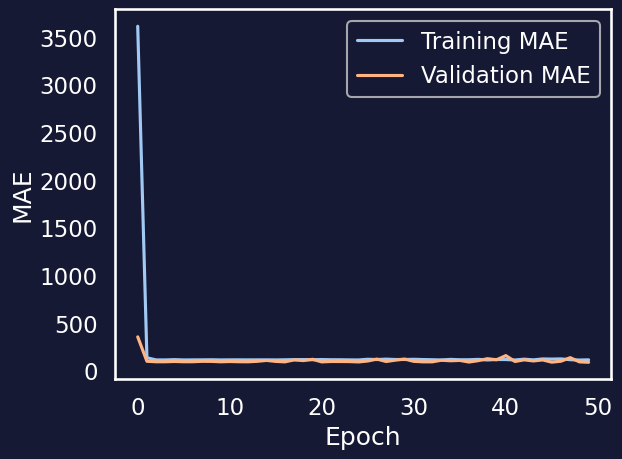

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32775.0781 - mae: 136.6617 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32775.0781 - mae: 136.6617 
Test Mean Absolute Error: 135.0450897216797


{'mae': 135.04512,
 'mse': 32789.3,
 'rmse': 181.07816,
 'mape': 0.78311414,
 'mase': 1.0726315}

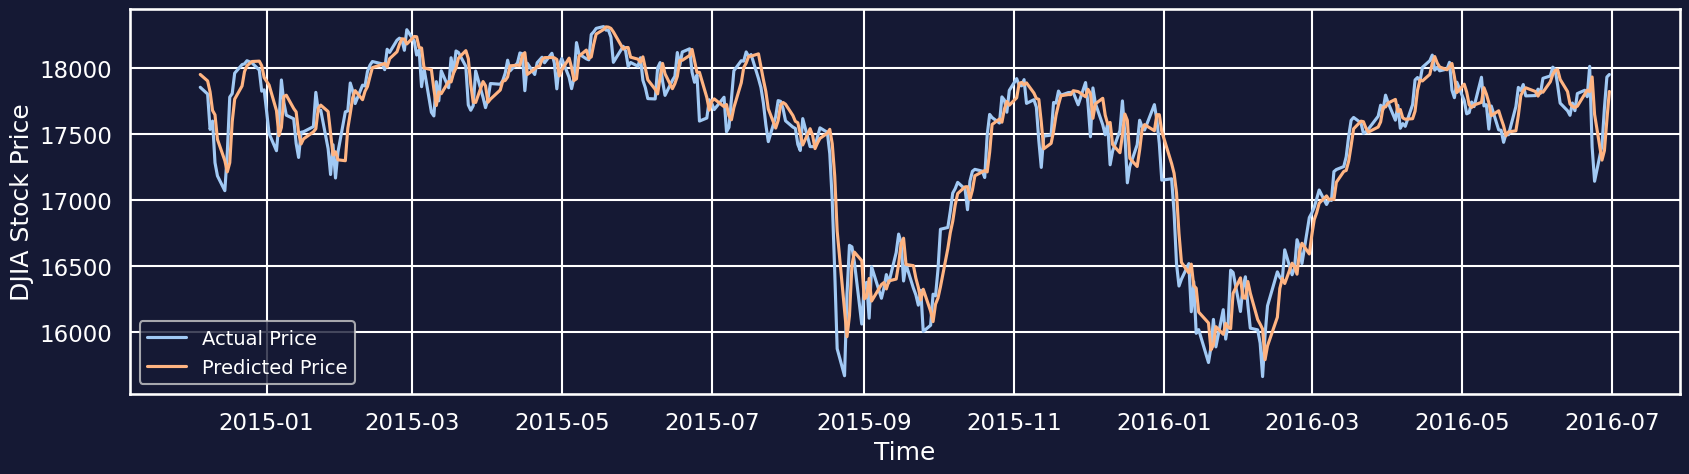

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


# Assuming you have numerical features (x_train, x_test) and labels (y_train, y_test)

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression


learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Use appropriate metrics for regression

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test).flatten()

model.evaluate(x_test,y_test)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions, format="-", label="Predicted Price")

# Flatten y_test
y_test_flat = y_test.to_numpy().flatten()


# Evaluate the model's predictions
model_results = evaluate_preds(y_true=y_test_flat, y_pred=predictions)
model_results

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 32218.9238 - mae: 135.7916
Test Mean Absolute Error: 134.2963104248047


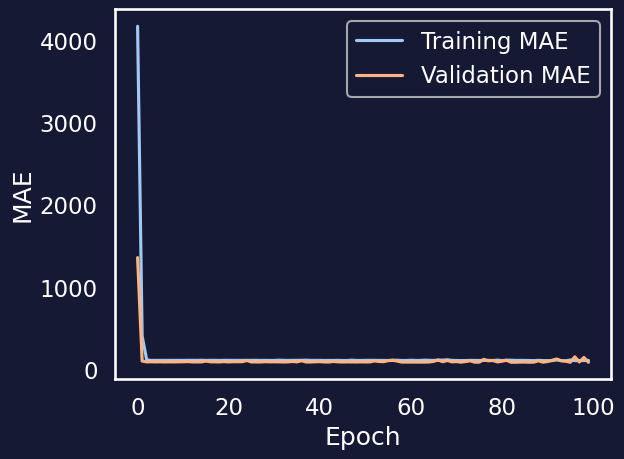

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32218.9238 - mae: 135.7916 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32218.9238 - mae: 135.7916 
Test Mean Absolute Error: 134.2963104248047


{'mae': 134.29631,
 'mse': 32268.914,
 'rmse': 179.6355,
 'mape': 0.7787405,
 'mase': 1.0666839}

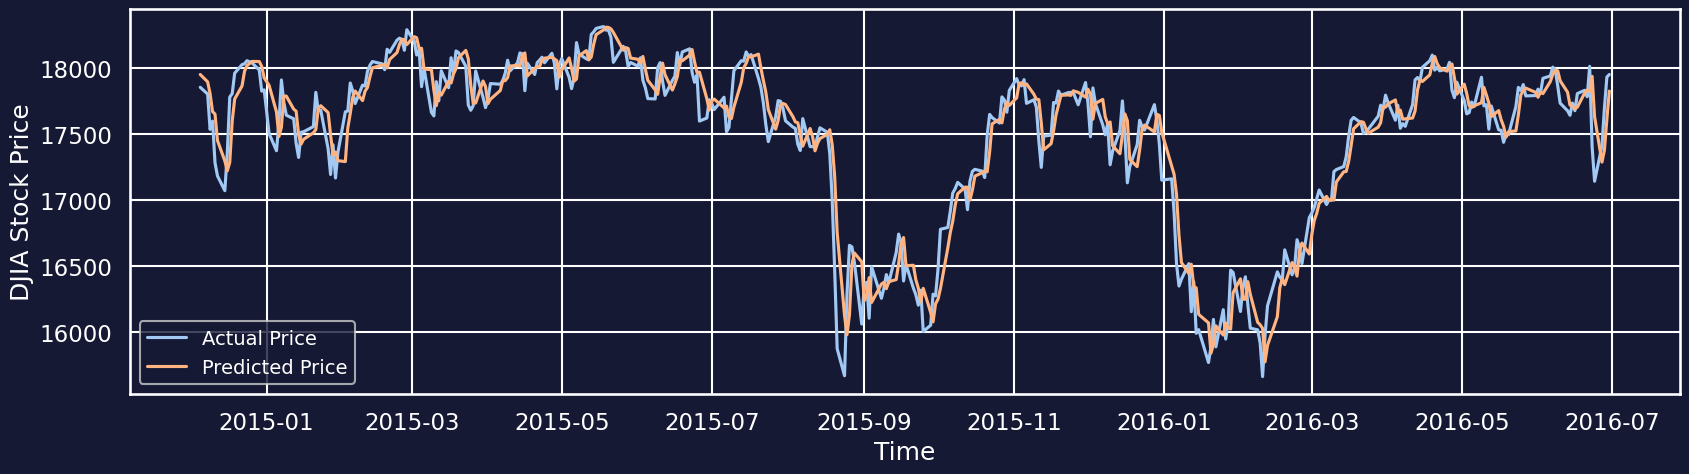

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression

# Adjusted learning rate
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test).flatten()

model.evaluate(x_test,y_test)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions, format="-", label="Predicted Price")

# Flatten y_test
y_test_flat = y_test.to_numpy().flatten()

# Evaluate the model's predictions
model_results = evaluate_preds(y_true=y_test_flat, y_pred=predictions)
model_results

In [ ]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1580, 1580, 395, 395)

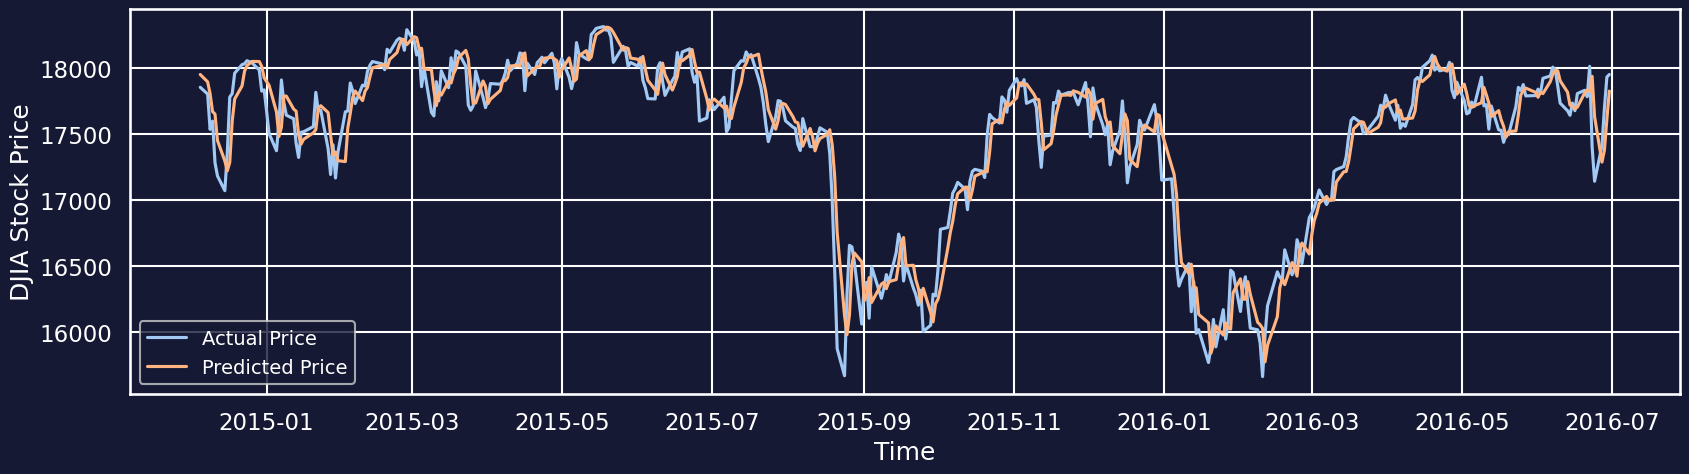

In [ ]:

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions, format="-", label="Predicted Price")

In [ ]:
# Evaluate the model's predictions
Keras_Sequential_Model_results = evaluate_preds(y_true=y_test_flat, y_pred=predictions)
Keras_Sequential_Model_results

{'mae': 134.29631,
 'mse': 32268.914,
 'rmse': 179.6355,
 'mape': 0.7787405,
 'mase': 1.0666839}

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results}).T
model_results

mae           mse        rmse      mape  \
naive_model               125.681572  27671.523438  166.347595  0.728094   
Keras_Sequential_results  134.296310  32268.914062  179.635498  0.778741   

                              mase  
naive_model               0.998652  
Keras_Sequential_results  1.066684

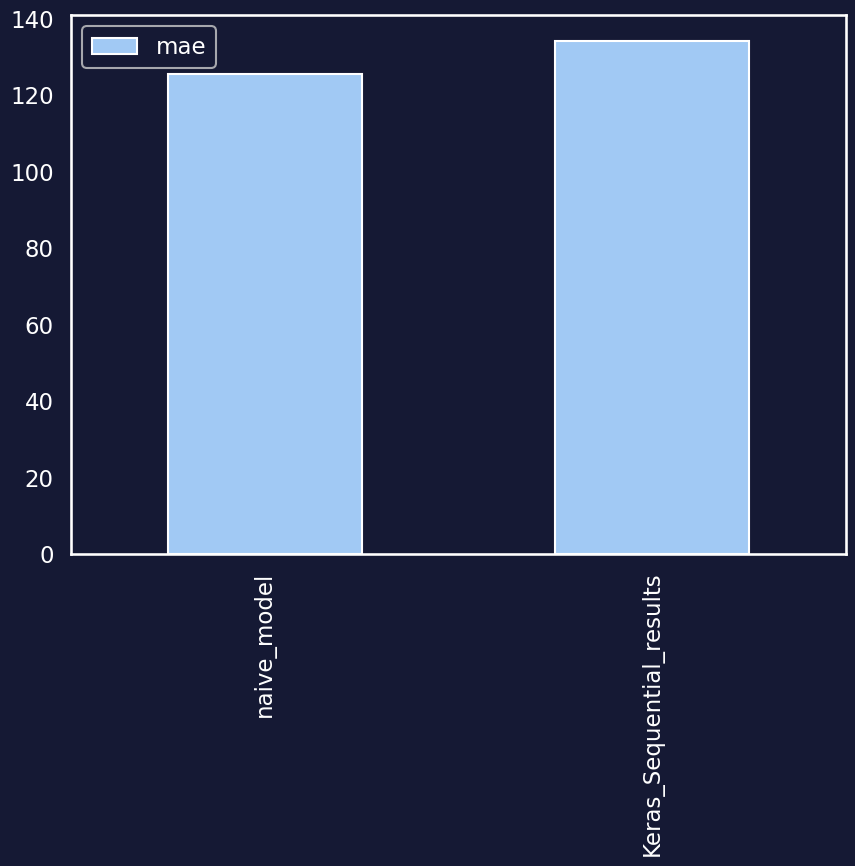

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

In [ ]:
bitcoin_prices_windowed

Open          High           Low         Close  \
Date                                                                 
2008-08-27  11412.459961  11554.459961  11381.769531  11502.509766   
2008-08-28  11499.870117  11715.179688  11499.790039  11715.179688   
2008-08-29  11713.230469  11713.230469  11543.389648  11543.959961   
2008-09-02  11545.629883  11790.169922  11471.900391  11516.919922   
2008-09-03  11506.009766  11554.379883  11416.530273  11532.879883   
...                  ...           ...           ...           ...   
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   

                     EMA           MA7       Close+1   Close Price  
Date                                                                
2008-08-27  11476.097660  11446.554130  11412.870117  11715.179688  
2008-08-28  11635.493777  11498.929827  11502.509766  11543.959961  
2008-08-29  11574.470199  11517.005580  11715.179688  11516.919922  
2008-09-02  11536.103131  11529.392718  11543.959961  11532.879883  
2008-09-03  11533.954295  11515.795620  11516.919922  11188.230469  
...                  ...           ...           ...           ...  
2016-06-27  17286.702282  17663.235770  17400.750000  17409.720703  
2016-06-28  17368.714563  17625.315848  17140.240234  17694.679688  
2016-06-29  17586.024646  17609.574498  17409.720703  17929.990234  
2016-06-30  17815.335038  17623.897321  17694.679688  17949.369141  
2016-07-01  17904.691107  17647.974330  17929.990234           NaN  

[1976 rows x 8 columns]

In [ ]:
# Convert data to integers
X_all = bitcoin_prices_windowed.drop(["Close Price"], axis=1).dropna().to_numpy().astype(int)
y_all = bitcoin_prices_windowed.dropna()["Close Price"].to_numpy().astype(int)

# Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 16
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
X_all

array([[11412, 11554, 11381, ..., 11476, 11446, 11412],
       [11499, 11715, 11499, ..., 11635, 11498, 11502],
       [11713, 11713, 11543, ..., 11574, 11517, 11715],
       ...,
       [17456, 17704, 17456, ..., 17586, 17609, 17409],
       [17712, 17930, 17711, ..., 17815, 17623, 17694],
       [17924, 18002, 17916, ..., 17904, 17647, 17929]])

In [ ]:
last_window = X_all[-1:]
last_window.shape[1]

7

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 1 # since our Bitcoin data is daily, this is for 14 days

In [ ]:
future_forecast = []
last_window = X_all[-1:]

In [ ]:
last_window

array([[17924, 18002, 17916, 17949, 17904, 17647, 17929]])

# CNN

In [ ]:
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1580, 1580, 395, 395)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 30763.7969 - mae: 130.6279
Test Mean Absolute Error: 129.54998779296875


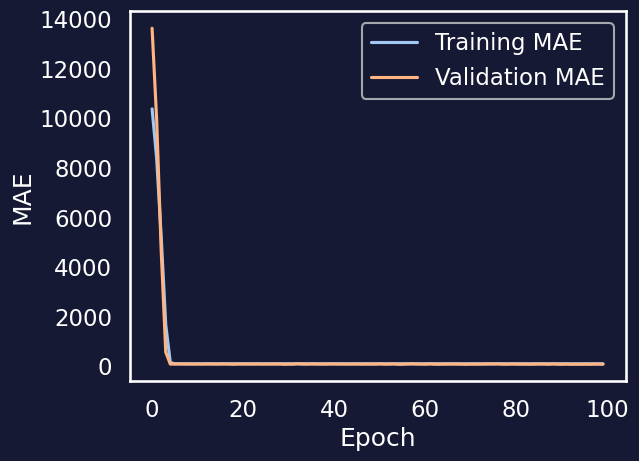

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


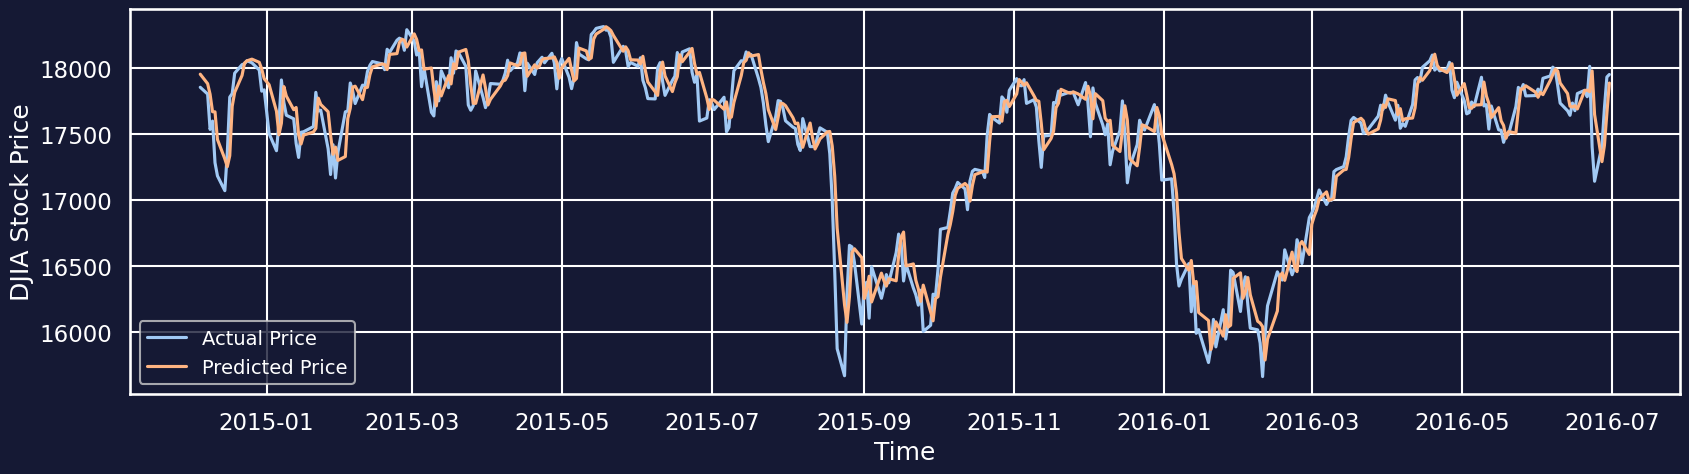

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Assuming x_train, y_train, x_test, and y_test are prepared as per the instructions

# Align the indices of x_train and y_train
min_samples_train = min(len(x_train), len(y_train))
x_train_aligned = x_train[:min_samples_train]
y_train_aligned = y_train[:min_samples_train]

# Align the indices of x_test and y_test
min_samples_test = min(len(x_test), len(y_test))
x_test_aligned = x_test[:min_samples_test]
y_test_aligned = y_test[:min_samples_test]

# Reshape the input data for CNN
x_train_reshaped = x_train_aligned.reshape((x_train_aligned.shape[0], x_train_aligned.shape[1], 1))
x_test_reshaped = x_test_aligned.reshape((x_test_aligned.shape[0], x_test_aligned.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_aligned.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Adjusted learning rate
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(x_train_reshaped, y_train_aligned, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_reshaped, y_test_aligned)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test_reshaped)

# Ensure predictions and true values are 1-dimensional arrays
predictions = predictions.flatten()
y_test_aligned_flat = y_test_aligned[:len(predictions)].to_numpy().flatten()

# Plot future price predictions
plt.figure(figsize=(20, 5))
plot_time_series(y_test_aligned.index[:len(predictions)], y_test_aligned_flat, format="-", label="Actual Price")
plot_time_series(y_test_aligned.index[:len(predictions)], predictions, format="-", label="Predicted Price")

In [ ]:
# Evaluate the model's predictions
CNN_model_results = evaluate_preds(y_true=y_test_aligned_flat, y_pred=predictions)
CNN_model_results

{'mae': 129.54999,
 'mse': 31140.451,
 'rmse': 176.46657,
 'mape': 0.75183266,
 'mase': 1.0289849}

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results}).T
model_results

mae           mse        rmse      mape  \
naive_model               125.681572  27671.523438  166.347595  0.728094   
Keras_Sequential_results  134.296310  32268.914062  179.635498  0.778741   
CNN_results               129.549988  31140.451172  176.466568  0.751833   

                              mase  
naive_model               0.998652  
Keras_Sequential_results  1.066684  
CNN_results               1.028985

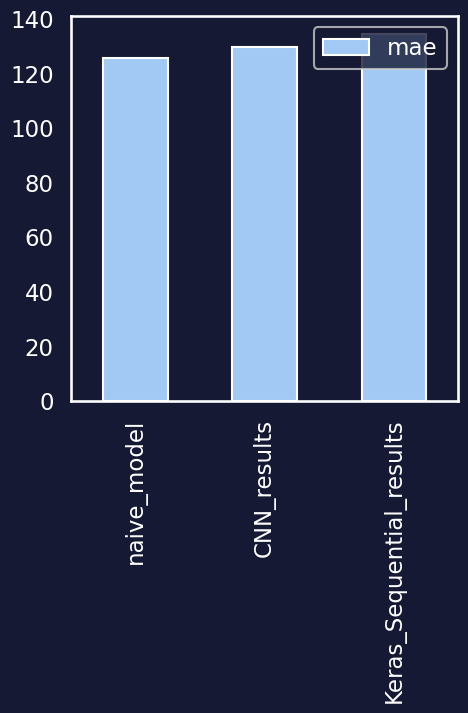

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(5, 5), kind="bar");

# Clean Text data

In [ ]:
final_data = pd.read_csv(r"/content/data.csv")

In [ ]:
final_data.head(2)

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is what it's come to: trading sex fo...  11729.669922   

           High           Low         Close     Volume     Adj Close  \
0  11759.959961  11388.040039  11734.320312  212830000  11734.320312   
1  11867.110352  11675.530273  11782.349609  183190000  11782.349609   

                                        cleaned_data  \
0  georgia russian airplan countri brink war brea...   
1  america nato help help help iraq bush foot geo...   

                                          spellcheck  
0  georgia russian airplane country brink war bre...  
1  america nato help help help iraq bush foot geo...  

[2 rows x 35 columns]

In [ ]:
sent_df = final_data.copy()


In [ ]:
data1_new = sent_df.set_index('Date')

In [ ]:
data1_new.head(2)

Label                                               Top1  \
Date                                                                   
2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
2008-08-11      1  b'Why wont America and Nato help us? If they w...   

                                                   Top2  \
Date                                                      
2008-08-08      b'BREAKING: Musharraf to be impeached.'   
2008-08-11  b'Bush puts foot down on Georgian conflict'   

                                                         Top3  \
Date                                                            
2008-08-08  b'Russia Today: Columns of troops roll into So...   
2008-08-11  b"Jewish Georgian minister: Thanks to Israeli ...   

                                                         Top4  \
Date                                                            
2008-08-08  b'Russian tanks are moving towards the capital...   
2008-08-11  b'Georgian army flees in disarray as Russians ...   

                                                         Top5  \
Date                                                            
2008-08-08  b"Afghan children raped with 'impunity,' U.N. ...   
2008-08-11      b"Olympic opening ceremony fireworks 'faked'"   

                                                         Top6  \
Date                                                            
2008-08-08  b'150 Russian tanks have entered South Ossetia...   
2008-08-11  b'What were the Mossad with fraudulent New Zea...   

                                                         Top7  \
Date                                                            
2008-08-08  b"Breaking: Georgia invades South Ossetia, Rus...   
2008-08-11  b'Russia angered by Israeli military sale to G...   

                                                         Top8  \
Date                                                            
2008-08-08  b"The 'enemy combatent' trials are nothing but...   
2008-08-11  b'An American citizen living in S.Ossetia blam...   

                                                         Top9  ...  \
Date                                                           ...   
2008-08-08  b'Georgian troops retreat from S. Osettain cap...  ...   
2008-08-11  b'Welcome To World War IV! Now In High Definit...  ...   

                                                        Top24  \
Date                                                            
2008-08-08  b'Visitors Suffering from Mental Illnesses Ban...   
2008-08-11                 b'Russia is so much better at war'   

                                                        Top25          Open  \
Date                                                                          
2008-08-08           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
2008-08-11  b"So this is what it's come to: trading sex fo...  11729.669922   

                    High           Low         Close     Volume     Adj Close  \
Date                                                                            
2008-08-08  11759.959961  11388.040039  11734.320312  212830000  11734.320312   
2008-08-11  11867.110352  11675.530273  11782.349609  183190000  11782.349609   

                                                 cleaned_data  \
Date                                                            
2008-08-08  georgia russian airplan countri brink war brea...   
2008-08-11  america nato help help help iraq bush foot geo...   

                                                   spellcheck  
Date                                                           
2008-08-08  georgia russian airplane country brink war bre...  
2008-08-11  america nato help help help iraq bush foot geo...  

[2 rows x 34 columns]

In [ ]:
final_df = data1_new[['Close',"spellcheck"]]

In [ ]:
final_spell = data1_new[["spellcheck"]]

In [ ]:
final_df = data1_new[['Close']]

In [ ]:
final_df

Close
Date                    
2008-08-08  11734.320312
2008-08-11  11782.349609
2008-08-12  11642.469727
2008-08-13  11532.959961
2008-08-14  11615.929688
...                  ...
2016-06-27  17140.240234
2016-06-28  17409.720703
2016-06-29  17694.679688
2016-06-30  17929.990234
2016-07-01  17949.369141

[1989 rows x 1 columns]

In [ ]:
def get_tech_ind(data):
    data['MA7'] = data.iloc[:,0].rolling(window=7).mean() #Close column
    data['MA20'] = data.iloc[:,0].rolling(window=20).mean() #Close Column

    data['MACD'] = data.iloc[:,0].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 0].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,0].ewm(com=0.5).mean()

    return data

In [ ]:
tech_df = get_tech_ind(final_df)
dataset = tech_df.iloc[20:,:]
dataset.head()

Close           MA7          MA20       MACD        20SD  \
Date                                                                          
2008-09-08  11510.740234  11461.267160  11503.387402 -23.789161  151.597006   
2008-09-09  11230.730469  11392.060128  11475.806445 -29.334960  148.316713   
2008-09-10  11268.919922  11352.768694  11457.128955 -25.654980  149.737930   
2008-09-11  11433.709961  11340.881557  11452.166455  -7.070017  148.733794   
2008-09-12  11421.990234  11325.040179  11442.469483  10.050858  143.733062   

              upper_band    lower_band           EMA  
Date                                                  
2008-09-08  11806.581414  11200.193391  11423.314793  
2008-09-09  11772.439871  11179.173020  11294.925244  
2008-09-10  11756.604816  11157.653094  11277.588363  
2008-09-11  11749.634043  11154.698867  11381.669428  
2008-09-12  11729.935607  11155.003358  11408.549965

In [ ]:
final = pd.merge(dataset, final_spell, how='outer', on='Date')

In [ ]:
final.head(5)

Close           MA7          MA20       MACD        20SD  \
Date                                                                          
2008-09-08  11510.740234  11461.267160  11503.387402 -23.789161  151.597006   
2008-09-09  11230.730469  11392.060128  11475.806445 -29.334960  148.316713   
2008-09-10  11268.919922  11352.768694  11457.128955 -25.654980  149.737930   
2008-09-11  11433.709961  11340.881557  11452.166455  -7.070017  148.733794   
2008-09-12  11421.990234  11325.040179  11442.469483  10.050858  143.733062   

              upper_band    lower_band           EMA  \
Date                                                   
2008-09-08  11806.581414  11200.193391  11423.314793   
2008-09-09  11772.439871  11179.173020  11294.925244   
2008-09-10  11756.604816  11157.653094  11277.588363   
2008-09-11  11749.634043  11154.698867  11381.669428   
2008-09-12  11729.935607  11155.003358  11408.549965   

                                                   spellcheck  
Date                                                           
2008-09-08  french judge order branch scientologist leader...  
2008-09-09  love world thai prime minister sama sundaravej...  
2008-09-10  dutch ban burial pick child school year britis...  
2008-09-11  american intellig confirm late military action...  
2008-09-12  open finish saudi arabia later putin strip cnn...

In [ ]:
final = final.dropna()

In [ ]:
training_news = final_spell

In [ ]:
len(final_spell)

1989

In [ ]:
split_size = int(len(final_spell) * 0.8)
train_news = training_news[:split_size]
train_news.head(5)

spellcheck
Date                                                         
2008-08-08  georgia russian airplane country brink war bre...
2008-08-11  america nato help help help iraq bush foot geo...
2008-08-12  remember adr year old sing open ceremony fake ...
2008-08-13  refs israel weapon attack iran report preside ...
2008-08-14  expert admit legal drug war south rosetta pict...

In [ ]:
test_news = training_news[split_size:]
test_news.head(5)

spellcheck
Date                                                         
2014-12-03  british man find nailbomb weapon each plan mas...
2014-12-04  nasa office announce man mar mission test laun...
2014-12-05  orion deep space capsule launch dozen chinese ...
2014-12-08  mass survey expos snowden justify fight terror...
2014-12-09  hacker tell song halt release interview aleph ...

In [ ]:
test_news.tail(5)

spellcheck
Date                                                         
2016-06-27  barely rb share suspend trade tank pope church...
2016-06-28  scientist australia want save great barrier re...
2016-06-29  expos airport istanbul yemen preside terror of...
2016-06-30  jamaica propos marijuana dispense tourist airp...
2016-07-01  year old woman mexico city final receive birth...

In [ ]:
X = final.drop(columns=['Close', 'spellcheck'])
X

MA7          MA20       MACD        20SD    upper_band  \
Date                                                                          
2008-09-08  11461.267160  11503.387402 -23.789161  151.597006  11806.581414   
2008-09-09  11392.060128  11475.806445 -29.334960  148.316713  11772.439871   
2008-09-10  11352.768694  11457.128955 -25.654980  149.737930  11756.604816   
2008-09-11  11340.881557  11452.166455  -7.070017  148.733794  11749.634043   
2008-09-12  11325.040179  11442.469483  10.050858  143.733062  11729.935607   
...                  ...           ...        ...         ...           ...   
2016-06-27  17663.235770  17767.995019 -44.865946  205.436138  18178.867296   
2016-06-28  17625.315848  17749.121094 -46.806466  220.375674  18189.872442   
2016-06-29  17609.574498  17744.371582 -26.720515  220.479360  18185.330302   
2016-06-30  17623.897321  17748.943066   5.517607  223.462769  18195.868604   
2016-07-01  17647.974330  17756.058496  31.932074  227.637403  18211.333301   

              lower_band           EMA  
Date                                    
2008-09-08  11200.193391  11423.314793  
2008-09-09  11179.173020  11294.925244  
2008-09-10  11157.653094  11277.588363  
2008-09-11  11154.698867  11381.669428  
2008-09-12  11155.003358  11408.549965  
...                  ...           ...  
2016-06-27  17357.122743  17286.702282  
2016-06-28  17308.369746  17368.714563  
2016-06-29  17303.412862  17586.024646  
2016-06-30  17302.017529  17815.335038  
2016-07-01  17300.783691  17904.691107  

[1969 rows x 7 columns]

In [ ]:
split_size = int(len(X) * 0.8)
train_news = training_news[:split_size]
train_news.head(5)

spellcheck
Date                                                         
2008-08-08  georgia russian airplane country brink war bre...
2008-08-11  america nato help help help iraq bush foot geo...
2008-08-12  remember adr year old sing open ceremony fake ...
2008-08-13  refs israel weapon attack iran report preside ...
2008-08-14  expert admit legal drug war south rosetta pict...

In [ ]:
test_news = training_news[split_size:]
test_news.head(5)

spellcheck
Date                                                         
2014-11-10  pope france excommun pedophile argentina pries...
2014-11-11  geologist predict earthquake killer italian co...
2014-11-12  russian combat troop enter ukraine tank artill...
2014-11-13  european robot probe history land comet descen...
2014-11-14  sweden proof foreign sub enter water report lo...

In [ ]:
X

MA7          MA20       MACD        20SD    upper_band  \
Date                                                                          
2008-09-08  11461.267160  11503.387402 -23.789161  151.597006  11806.581414   
2008-09-09  11392.060128  11475.806445 -29.334960  148.316713  11772.439871   
2008-09-10  11352.768694  11457.128955 -25.654980  149.737930  11756.604816   
2008-09-11  11340.881557  11452.166455  -7.070017  148.733794  11749.634043   
2008-09-12  11325.040179  11442.469483  10.050858  143.733062  11729.935607   
...                  ...           ...        ...         ...           ...   
2016-06-27  17663.235770  17767.995019 -44.865946  205.436138  18178.867296   
2016-06-28  17625.315848  17749.121094 -46.806466  220.375674  18189.872442   
2016-06-29  17609.574498  17744.371582 -26.720515  220.479360  18185.330302   
2016-06-30  17623.897321  17748.943066   5.517607  223.462769  18195.868604   
2016-07-01  17647.974330  17756.058496  31.932074  227.637403  18211.333301   

              lower_band           EMA  
Date                                    
2008-09-08  11200.193391  11423.314793  
2008-09-09  11179.173020  11294.925244  
2008-09-10  11157.653094  11277.588363  
2008-09-11  11154.698867  11381.669428  
2008-09-12  11155.003358  11408.549965  
...                  ...           ...  
2016-06-27  17357.122743  17286.702282  
2016-06-28  17308.369746  17368.714563  
2016-06-29  17303.412862  17586.024646  
2016-06-30  17302.017529  17815.335038  
2016-07-01  17300.783691  17904.691107  

[1969 rows x 7 columns]

In [ ]:
y = final[['Close']]
y

Close
Date                    
2008-09-08  11510.740234
2008-09-09  11230.730469
2008-09-10  11268.919922
2008-09-11  11433.709961
2008-09-12  11421.990234
...                  ...
2016-06-27  17140.240234
2016-06-28  17409.720703
2016-06-29  17694.679688
2016-06-30  17929.990234
2016-07-01  17949.369141

[1969 rows x 1 columns]

In [ ]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1575, 1575, 394, 394)

In [ ]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()

# Transformers Models

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import GPT2Tokenizer, TFGPT2Model

# Instantiate the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2Model.from_pretrained("gpt2")




tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [ ]:

corpus = train_news["spellcheck"]

In [ ]:
corpus_test = test_news["spellcheck"]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_train = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_train[0])

Padded Sequence: [  469  2398   544   374 31562 19401  1499 29585  1175  2270 15026   283
 32188 18516   620   374 31269  1909  5721 31874  4836  5366   267   824
   316   544  9640  1907 35116   374 31562  6873 21344  5366   267   824
   316   544  7478  1844  4117  4903  2398   544 20381  2046  6580  6064
  1200  7262]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_test = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_test[0])

Padded Sequence: [   79  3008  1216   590   409 10709 27706   576  1822   298  1437 11503
  9159  3206  1323 16330  1263  2038  3331  3896 43784   649  3298  3896
  2948  3331  1263  2038 12274  1687    64  4218   479   292  1845 13645
  2245  1234   259  1414  2756  1568   410   541  3206  1323  2933  5475
  3716  1474]


In [ ]:
import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
#x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
#print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (1575, 57)


In [ ]:
x_test

array([[ 1.78687913e+04,  1.77717680e+04, -1.33097675e+02, ...,
         1.79858542e+04,  1.75576818e+04,  1.78278315e+04],
       [ 1.78339841e+04,  1.77676805e+04, -1.49477799e+02, ...,
         1.79969599e+04,  1.75384010e+04,  1.76313774e+04],
       [ 1.77935254e+04,  1.77668875e+04, -1.53130967e+02, ...,
         1.79985286e+04,  1.75352464e+04,  1.76080190e+04],
       ...,
       [ 1.76095745e+04,  1.77443716e+04, -2.67205154e+01, ...,
         1.81853303e+04,  1.73034129e+04,  1.75860246e+04],
       [ 1.76238973e+04,  1.77489431e+04,  5.51760710e+00, ...,
         1.81958686e+04,  1.73020175e+04,  1.78153350e+04],
       [ 1.76479743e+04,  1.77560585e+04,  3.19320743e+01, ...,
         1.82113333e+04,  1.73007837e+04,  1.79046911e+04]])

In [ ]:
x_train_combined

array([[ 1.14612672e+04,  1.15033874e+04, -2.37891607e+01, ...,
         6.06400000e+03,  1.20000000e+03,  7.26200000e+03],
       [ 1.13920601e+04,  1.14758064e+04, -2.93349602e+01, ...,
         1.28000000e+03,  1.05420000e+04,  2.60560000e+04],
       [ 1.13527687e+04,  1.14571290e+04, -2.56549802e+01, ...,
         8.05000000e+02,  1.24960000e+04,  8.50000000e+01],
       ...,
       [ 1.78485714e+04,  1.77282516e+04, -1.33268216e+02, ...,
         9.11400000e+03,  5.21000000e+03,  2.05420000e+04],
       [ 1.78691214e+04,  1.77484675e+04, -1.27963674e+02, ...,
         2.46500000e+03,  1.64100000e+03,  5.82000000e+02],
       [ 1.78726543e+04,  1.77623950e+04, -1.29745801e+02, ...,
         3.81320000e+04,  1.37300000e+03,  5.44000000e+02]])

In [ ]:
# Check the number of samples in each dataset
print("Number of samples in x_test:", x_test.shape[0])
print("Number of samples in padded_corpus_test:", padded_corpus_test.shape[0])

Number of samples in x_test: 394
Number of samples in padded_corpus_test: 414


In [ ]:
min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])

In [ ]:
# Trim or pad the datasets
x_test = x_test[:min_samples]
padded_corpus_test = padded_corpus_test[:min_samples]

In [ ]:
# Now, attempt the concatenation again
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

In [ ]:
# Check the shape after concatenation
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_test_combined: (394, 57)


In [ ]:
import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (1575, 57)
Shape of x_test_combined: (394, 57)


In [ ]:
combined_input_dim = 57

# Define GPT encoded + Dence model

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 20766000.0000 - mae: 3086.3420 - val_loss: 5317876.0000 - val_mae: 2194.6084
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 904083.8125 - mae: 764.6332 - val_loss: 262545.9375 - val_mae: 400.4985
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 288972.0938 - mae: 432.3024 - val_loss: 202505.8750 - val_mae: 357.9622
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 147236.3281 - mae: 300.8683 - val_loss: 239400.7188 - val_mae: 403.1801
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 128103.3750 - mae: 284.6927 - val_loss: 282374.8438 - val_mae: 441.1172
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94005.7188 - mae: 243.1803 - val_loss: 321430.4375 - val_mae: 478.5378
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71107.7578 - mae: 210.8389 - val_loss: 236891.2031 - val_mae: 408.3376
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 100523.9375 - mae: 253.6694 

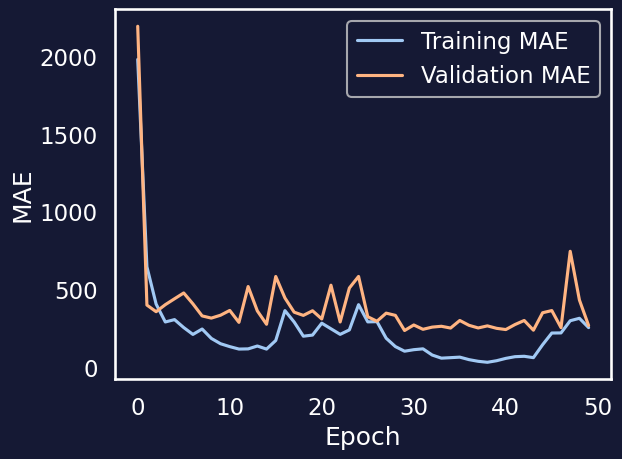

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164445.8281 - mae: 322.2691 
Test Mean Absolute Error: 326.4424133300781
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
{'mae': 326.44238, 'mse': 178153.7, 'rmse': 422.08258, 'mape': 1.885623, 'mase': 2.58895}


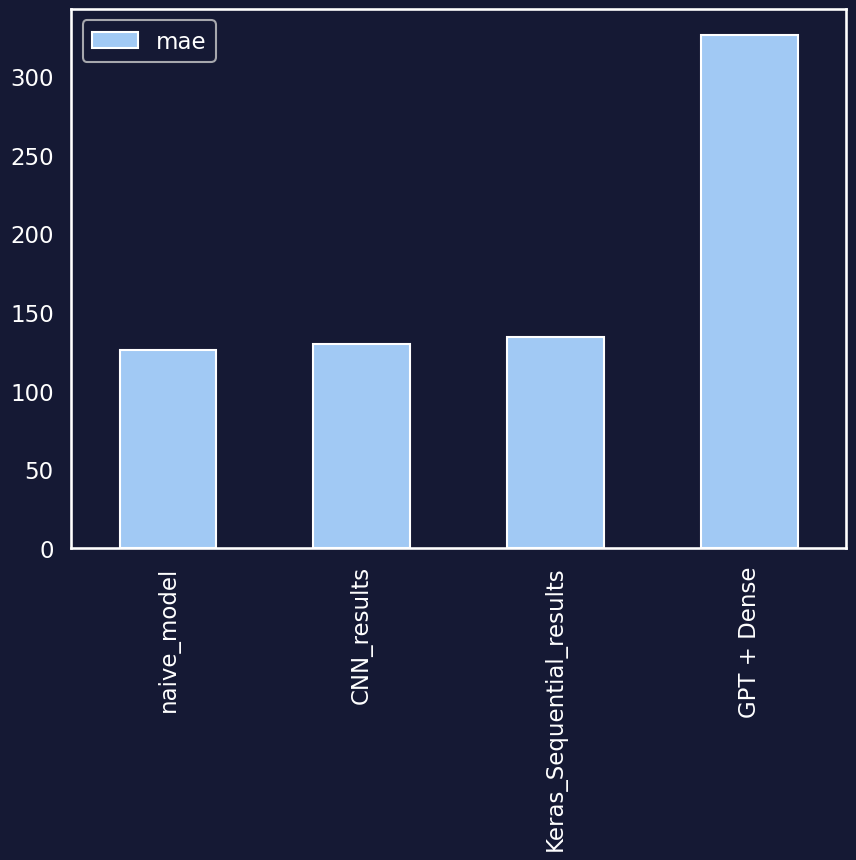

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=combined_input_dim))
model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression

# Compile the model with mean squared error loss for regression
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Use appropriate metrics for regression

# Train the model with combined inputs


# Train the model
#history = model.fit(x_train_combined, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Train the model
history = model.fit(x_train_combined, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Make predictions
predictions = model.predict(x_test_combined)

# Assuming evaluate_preds is a predefined function to evaluate predictions
gpt_dense_model_results = evaluate_preds(y_true=y_test.flatten(), y_pred=predictions.flatten())
print(gpt_dense_model_results)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT + Dense": gpt_dense_model_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

In [ ]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1575, 1575, 394, 394)

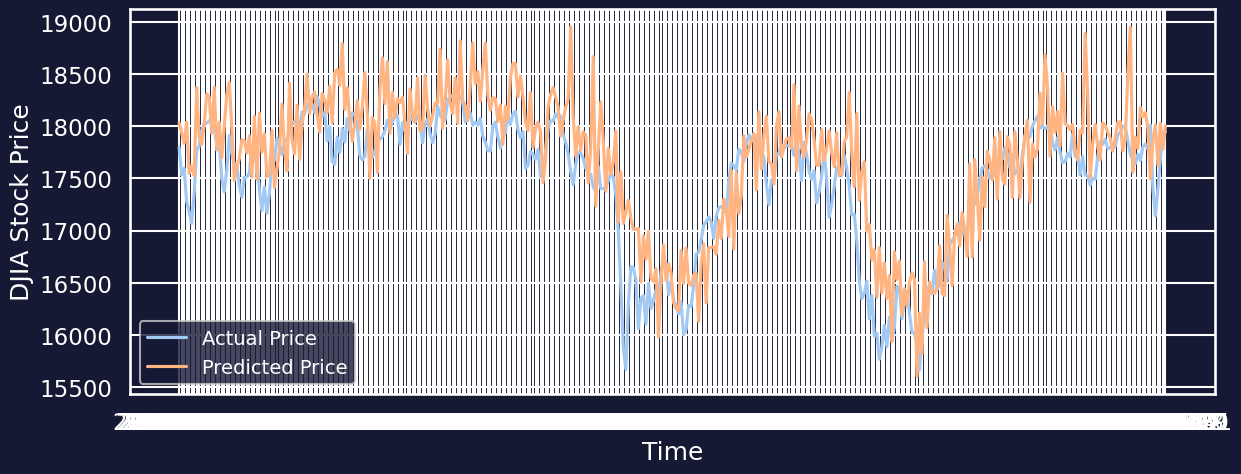

In [ ]:
# Plot future price predictions of sts
plt.figure(figsize=(14, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions, format="-", label="Predicted Price")

In [ ]:
model_results

mae            mse        rmse      mape  \
naive_model               125.681572   27671.523438  166.347595  0.728094   
Keras_Sequential_results  134.296310   32268.914062  179.635498  0.778741   
CNN_results               129.549988   31140.451172  176.466568  0.751833   
GPT + Dense               326.442383  178153.703125  422.082581  1.885623   

                              mase  
naive_model               0.998652  
Keras_Sequential_results  1.066684  
CNN_results               1.028985  
GPT + Dense               2.588950

# Define GPT model

In [ ]:
import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (1575, 57)
Shape of x_test_combined: (394, 57)


In [ ]:
# Load pre-trained GPT model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
gpt_model = TFGPT2Model.from_pretrained(model_name)

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


Shape of x_train_combined: (1575, 57)
Shape of x_test_combined: (394, 57)


All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - loss: 58943928.0000 - mae: 6177.1489 - val_loss: 707588.4375 - val_mae: 804.5298
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - loss: 298957.1875 - mae: 437.5819 - val_loss: 644818.3750 - val_mae: 768.8995
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 194384.0312 - mae: 348.1991 - val_loss: 795448.0000 - val_mae: 863.8917
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 143384.9531 - mae: 288.9946 - val_loss: 406995.2500 - val_mae: 602.3039
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 73991.3594 - mae: 209.2281 - val_loss: 159954.5469 - val_mae: 359.0179
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 62506.8047 - mae: 186.0770 - val_loss: 86322.3672 - val_mae: 253.1070
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 43012.0898 - mae: 157.1322 - val_loss: 116585.8672 - val_mae: 300.4136
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 38271.8359 - mae: 151.

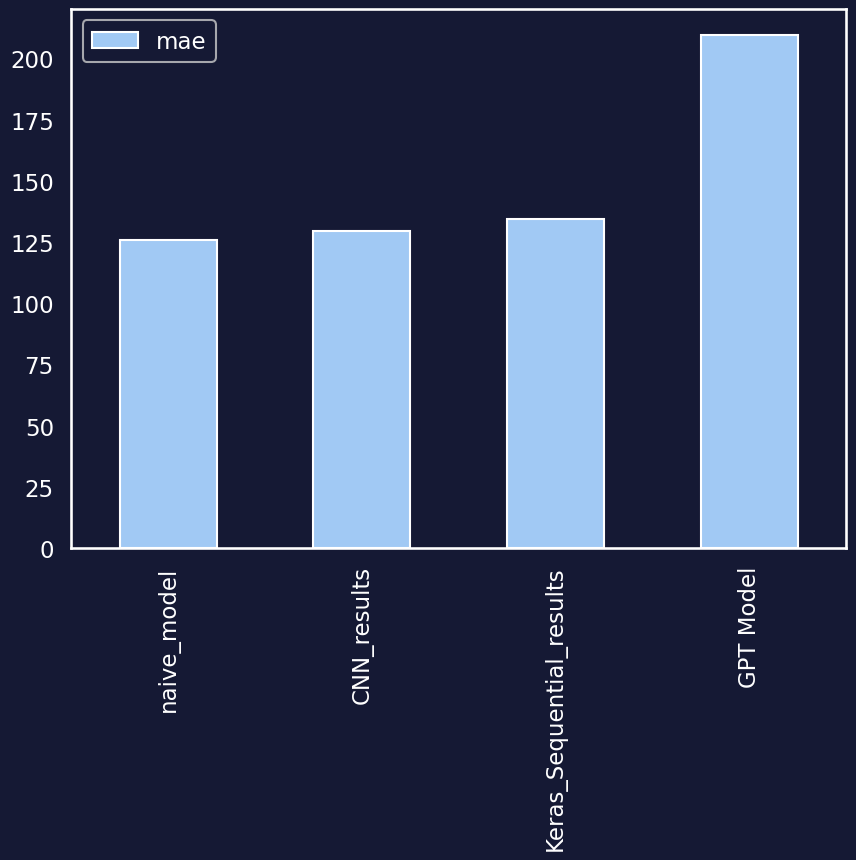

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Concatenate, Input
from transformers import GPT2Tokenizer, TFGPT2Model
import tensorflow as tf
import pandas as pd

# Assuming you have numerical features (x_train, x_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)
# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

your_numerical_feature_dim = 7
max_length = padded_corpus_train.shape[1]

# Load pre-trained GPT model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
gpt_model = TFGPT2Model.from_pretrained(model_name)

# Build a model using the GPT model as a feature extractor
gpt_model.trainable = False  # Freeze the pre-trained GPT layers

# GPT model input
gpt_input = Input(shape=(max_length,), dtype=tf.int32, name="gpt_input")

# Define a custom layer to use the GPT model
class GPT2FeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, gpt_model):
        super(GPT2FeatureExtractor, self).__init__()
        self.gpt_model = gpt_model

    def call(self, inputs):
        gpt_outputs = self.gpt_model(inputs)
        return gpt_outputs.last_hidden_state

# Use the custom layer
gpt_features = GPT2FeatureExtractor(gpt_model)(gpt_input)

# Flatten the GPT output
gpt_output_flat = Flatten()(gpt_features)

# Numerical input layer
numerical_input = Input(shape=(your_numerical_feature_dim,), name="numerical_input")

# Concatenate GPT features with numerical features
combined_input = Concatenate()([gpt_output_flat, numerical_input])

# Dense layers
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Define the combined model
combined_model = Model(inputs=[gpt_input, numerical_input], outputs=output_layer)

# Compile the model with mean squared error loss for regression
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with combined inputs
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_GPT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
gpt_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_GPT)
print(gpt_model_results)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()


In [ ]:
model_results

mae           mse        rmse      mape  \
naive_model               125.681572  27671.523438  166.347595  0.728094   
Keras_Sequential_results  134.296310  32268.914062  179.635498  0.778741   
CNN_results               129.549988  31140.451172  176.466568  0.751833   
GPT Model                 209.712677  71139.632812  266.720123  1.203865   

                              mase  
naive_model               0.998652  
Keras_Sequential_results  1.066684  
CNN_results               1.028985  
GPT Model                 1.663190

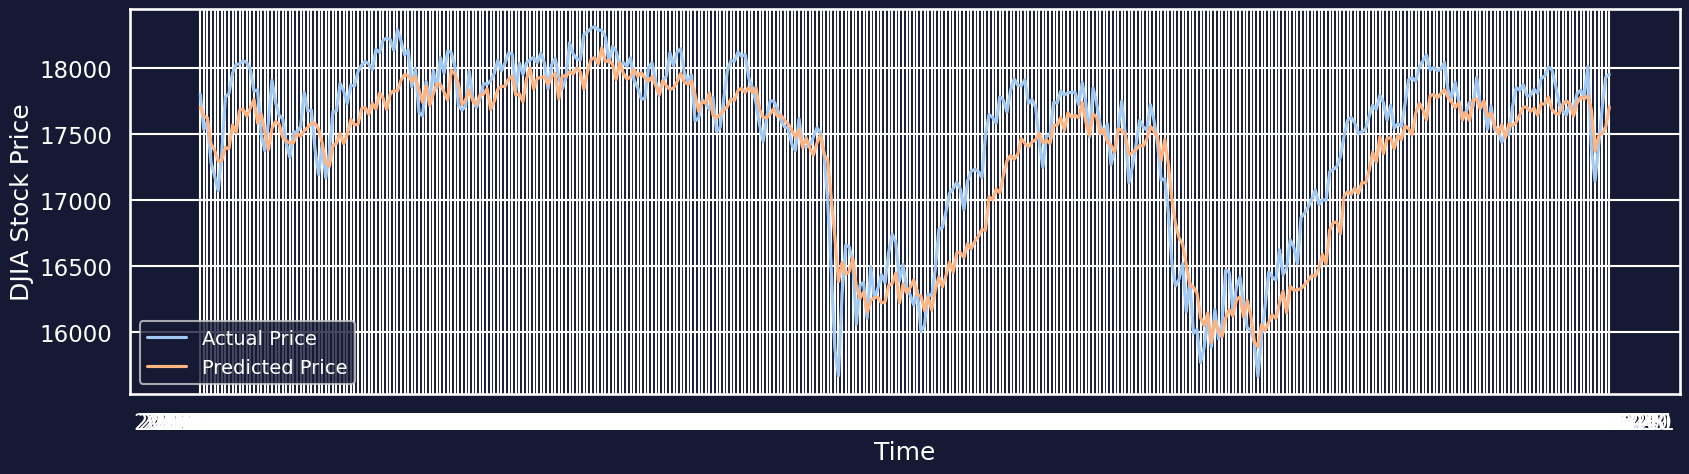

In [ ]:
# Plot future price predictions of sts
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_GPT, format="-", label="Predicted Price")

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 255ms/step - loss: 333654.8438 - mae: 416.0112 - val_loss: 44510.0508 - val_mae: 165.9250
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 10577.9697 - mae: 80.1850 - val_loss: 85350.0859 - val_mae: 250.7498
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 10925.3799 - mae: 82.7451 - val_loss: 35774.3516 - val_mae: 143.8654
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 7354.4033 - mae: 66.4442 - val_loss: 48614.3516 - val_mae: 175.5844
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 6590.4551 - mae: 63.9855 - val_loss: 37609.9766 - val_mae: 148.6360
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 6897.2417 - mae: 67.8831 - val_loss: 34749.6953 - val_mae: 141.0228
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 5787.2690 - mae: 60.6853 - val_loss: 33706.4688 - val_mae: 138.1952
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 5612.8047 - mae: 60.2183 - val_loss: 34184.4

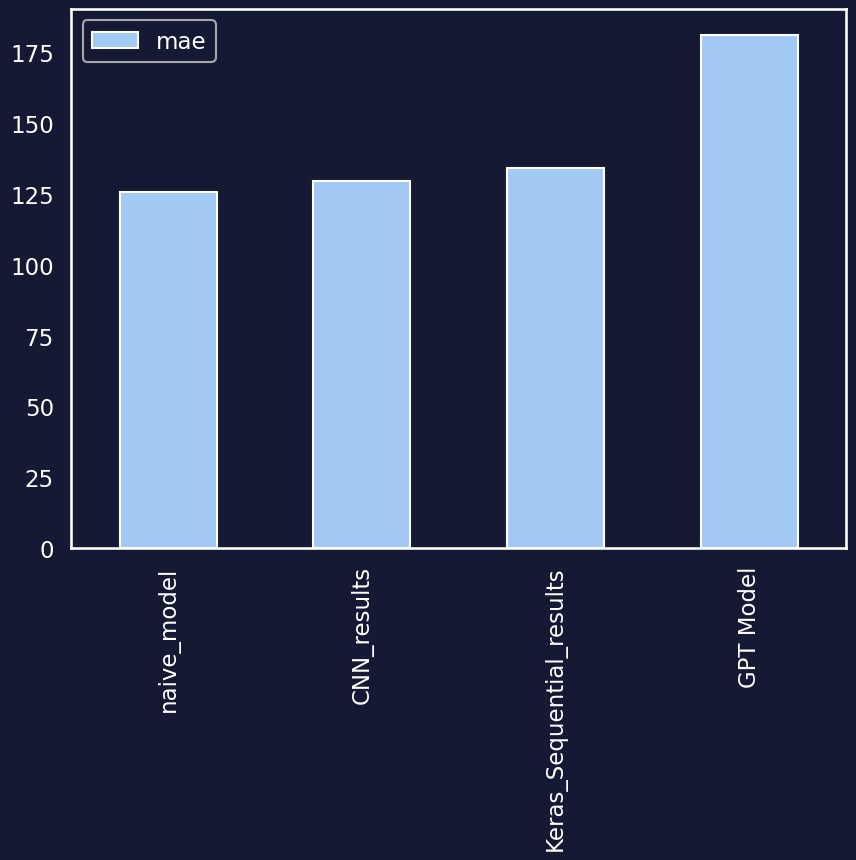

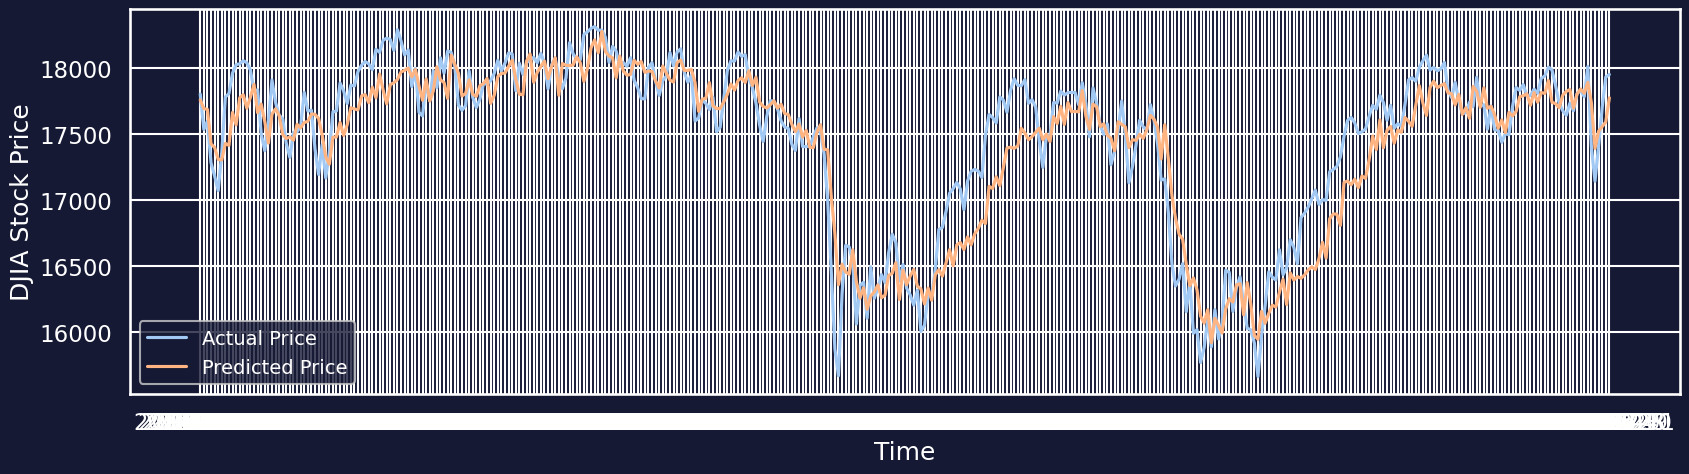

In [ ]:
# prompt: write further code from here

# Fine-tune the GPT model (optional)
gpt_model.trainable = True

# Recompile the combined model
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with combined inputs
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=10, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_GPT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
gpt_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_GPT)
print(gpt_model_results)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_GPT, format="-", label="Predicted Price")


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 2735.1008 - mae: 42.5425 - val_loss: 47412.4844 - val_mae: 174.2497
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1826.0132 - mae: 34.9452 - val_loss: 34017.8242 - val_mae: 140.5601
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 1616.2650 - mae: 33.0116 - val_loss: 38238.4844 - val_mae: 151.7165
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1121.9579 - mae: 26.7587 - val_loss: 35947.1094 - val_mae: 145.6296
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 834.5061 - mae: 22.6424 - val_loss: 41005.8984 - val_mae: 158.2095
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 447.0987 - mae: 16.5442 - val_loss: 46873.7148 - val_mae: 173.1582
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 424.5953 - mae: 16.1533 - val_loss: 54349.7656 - val_mae: 190.7194
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 464.6636 - mae: 17.1876 - val_loss: 41322.8789 - val_ma

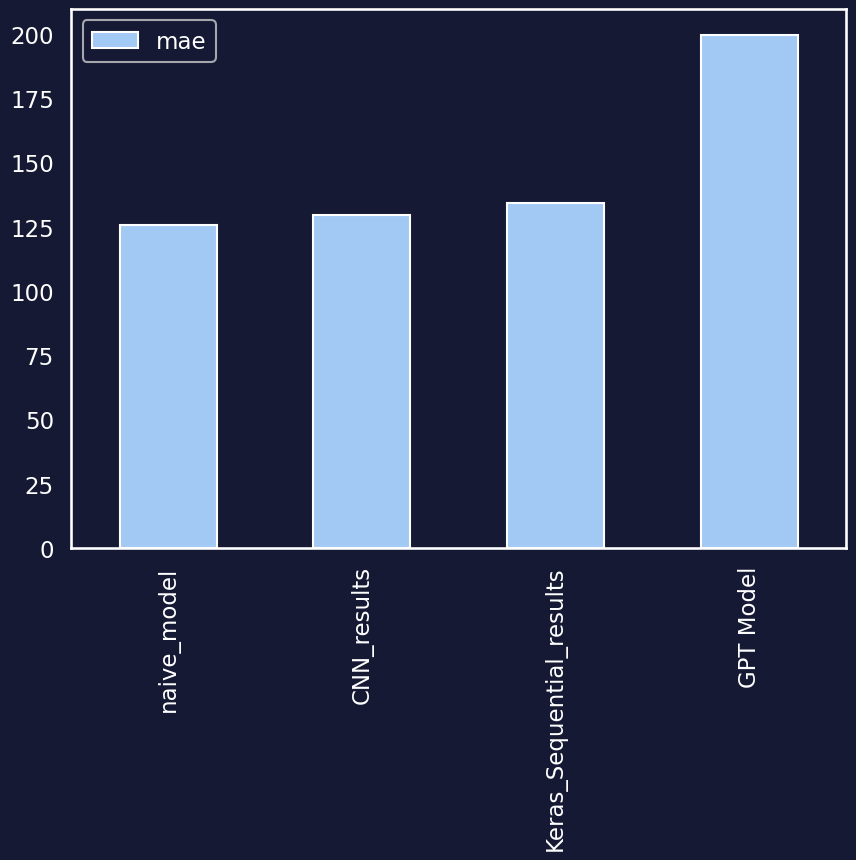

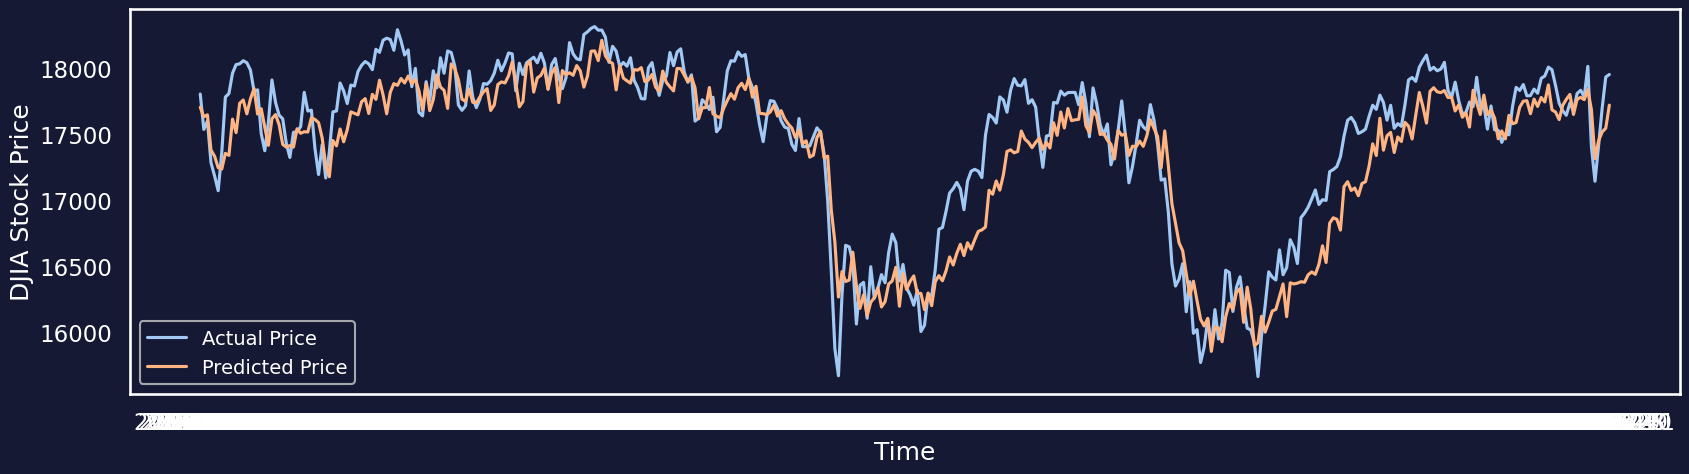

In [ ]:
# prompt: write further code from here for more fine tuning

# Fine-tune the GPT model further
# Increase the number of epochs for fine-tuning
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_GPT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
gpt_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_GPT)
print(gpt_model_results)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_GPT, format="-", label="Predicted Price")
plt.grid(False)




Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3957.5117 - mae: 51.6384 - val_loss: 34775.9531 - val_mae: 142.3241
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 6458.5176 - mae: 61.5946 - val_loss: 72799.4766 - val_mae: 228.4951
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 3649.8501 - mae: 49.5931 - val_loss: 36193.8086 - val_mae: 146.1245
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1220.0095 - mae: 28.0592 - val_loss: 36218.9531 - val_mae: 146.4762
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 3197.0227 - mae: 48.3597 - val_loss: 50106.7539 - val_mae: 181.2354
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1949.5254 - mae: 34.5272 - val_loss: 67963.4062 - val_mae: 218.9590
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 3945.7942 - mae: 53.2317 - val_loss: 35096.3359 - val_mae: 144.1208
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 2767.2881 - mae: 40.4416 - val_loss: 50488.3086 - va

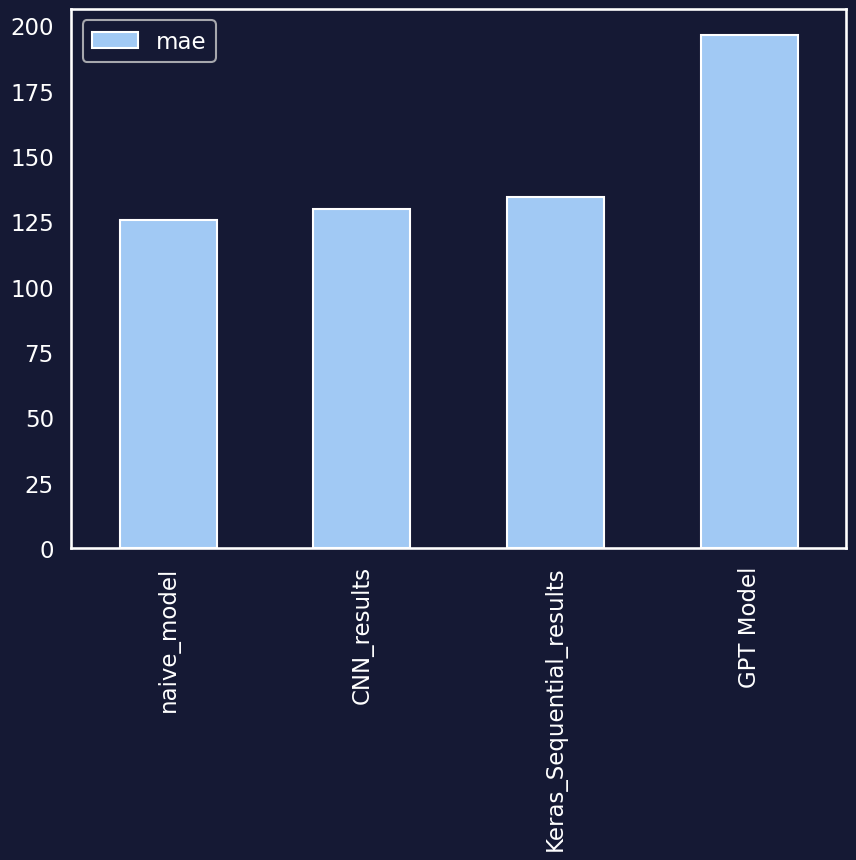

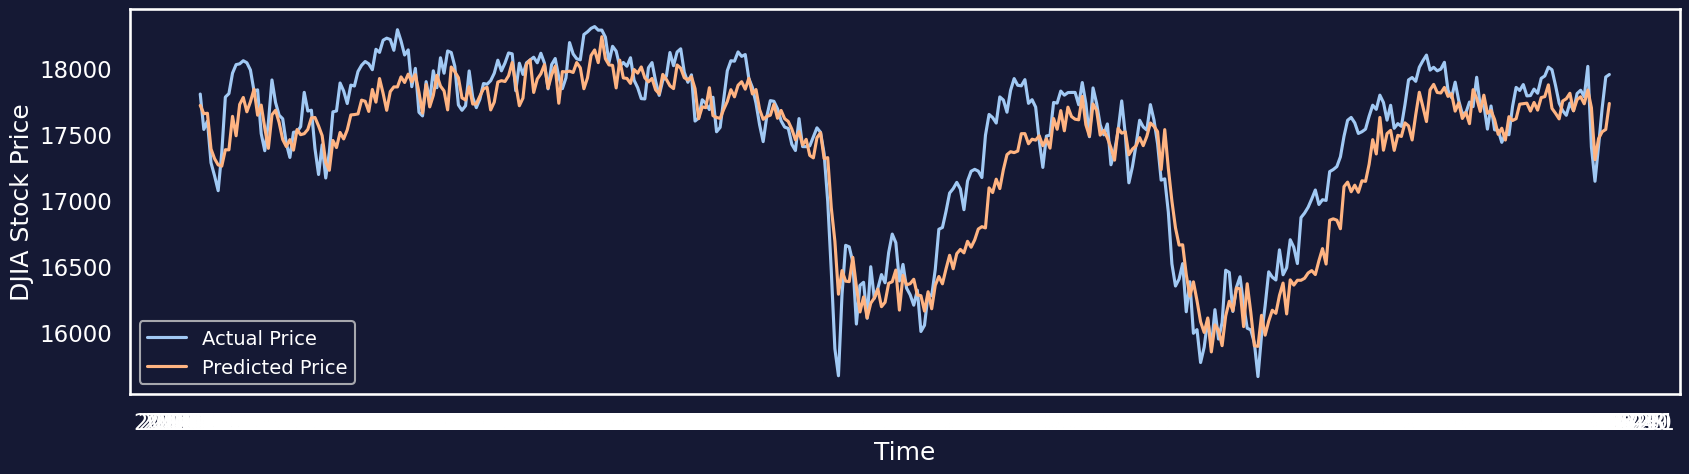

In [ ]:
# prompt: write furher code for more fine tuning for low mae

# Increase the number of epochs for fine-tuning
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=30, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_GPT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
gpt_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_GPT)
print(gpt_model_results)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_GPT, format="-", label="Predicted Price")
plt.grid(False)



Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1246.9917 - mae: 27.8062 - val_loss: 32760.4316 - val_mae: 138.0475
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 1905.6906 - mae: 34.9779 - val_loss: 54224.5508 - val_mae: 190.5504
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 1147.5276 - mae: 27.1122 - val_loss: 40207.0273 - val_mae: 156.5938
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 474.4048 - mae: 16.8486 - val_loss: 32541.5117 - val_mae: 137.1661
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 978.0450 - mae: 24.8489 - val_loss: 49617.8633 - val_mae: 179.9760
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 1075.8477 - mae: 25.9502 - val_loss: 45867.9609 - val_mae: 170.9580
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 837.8493 - mae: 22.9980 - val_loss: 61926.7383 - val_mae: 207.0742
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1906.5240 - mae: 35.2707 - val_loss: 32129.1934 - val_m

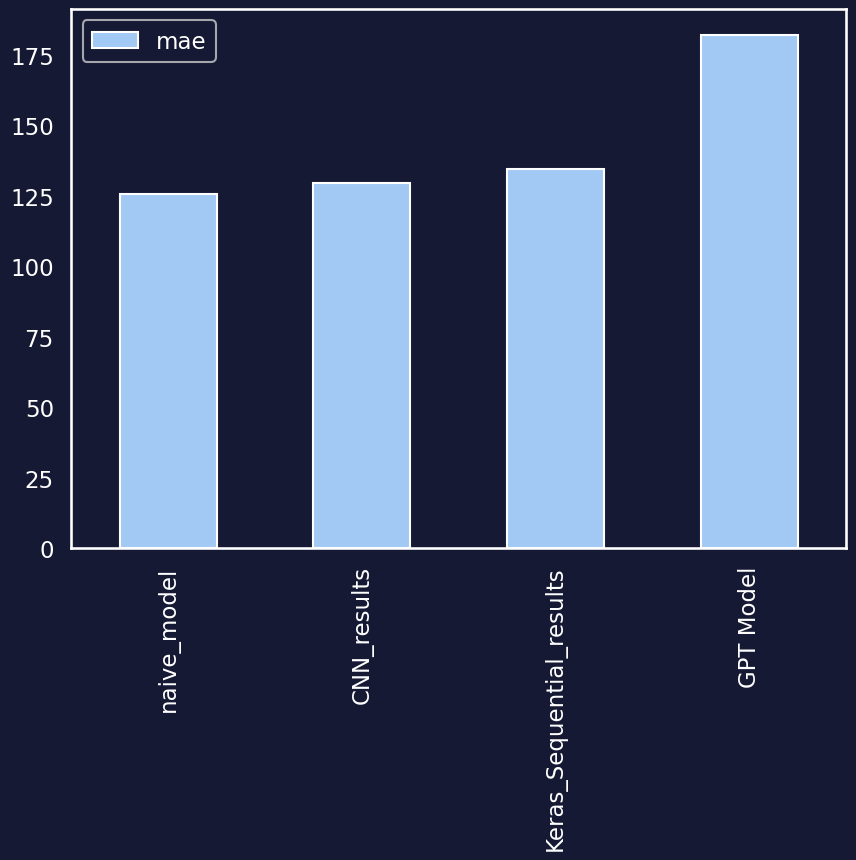

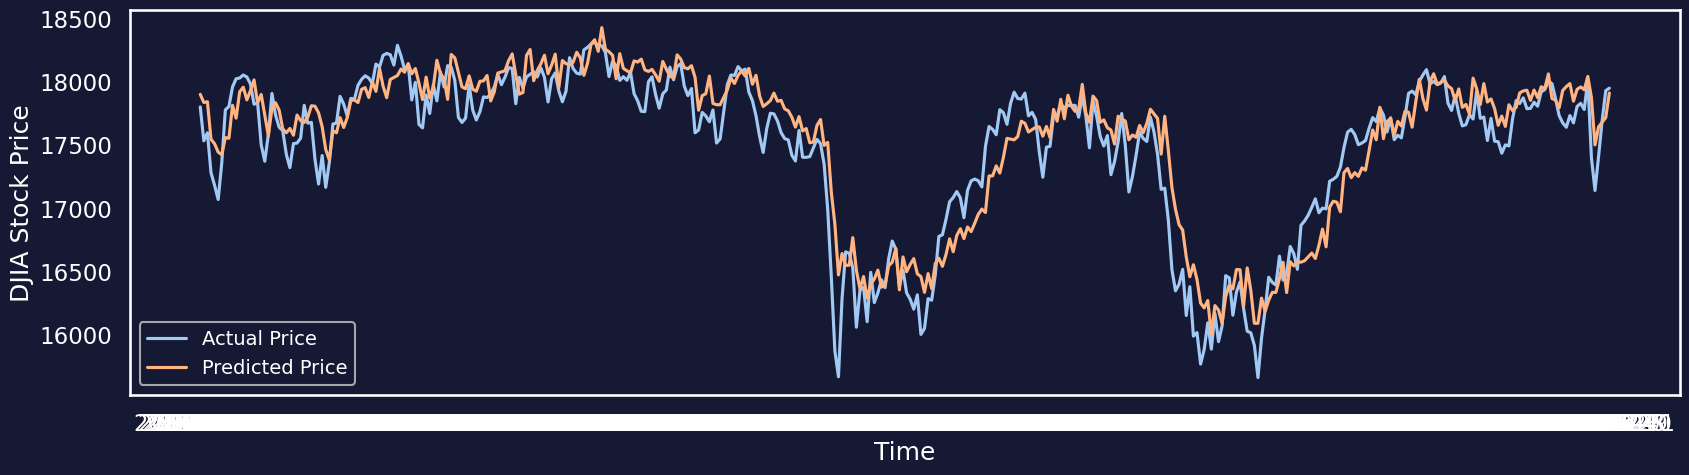

In [ ]:
# prompt: write furher code for more fine tuning for low mae

# Increase the number of epochs for fine-tuning
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_GPT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
gpt_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_GPT)
print(gpt_model_results)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_GPT, format="-", label="Predicted Price")
plt.grid(False)




Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 3799.5806 - mae: 49.7475 - val_loss: 34938.3438 - val_mae: 143.3552
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 1034.2733 - mae: 26.0181 - val_loss: 34897.3047 - val_mae: 143.0051
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 1307.4977 - mae: 30.6113 - val_loss: 33967.2969 - val_mae: 140.7035
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 1402.1809 - mae: 31.0446 - val_loss: 43765.1602 - val_mae: 165.4141
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 671.4070 - mae: 20.1084 - val_loss: 35022.1211 - val_mae: 143.4962
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 654.0945 - mae: 20.4669 - val_loss: 52151.0000 - val_mae: 185.6984
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 1036.9352 - mae: 27.0000 - val_loss: 40028.0000 - val_mae: 156.1481
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 1319.2379 - mae: 28.6816 - val_loss: 44262.832

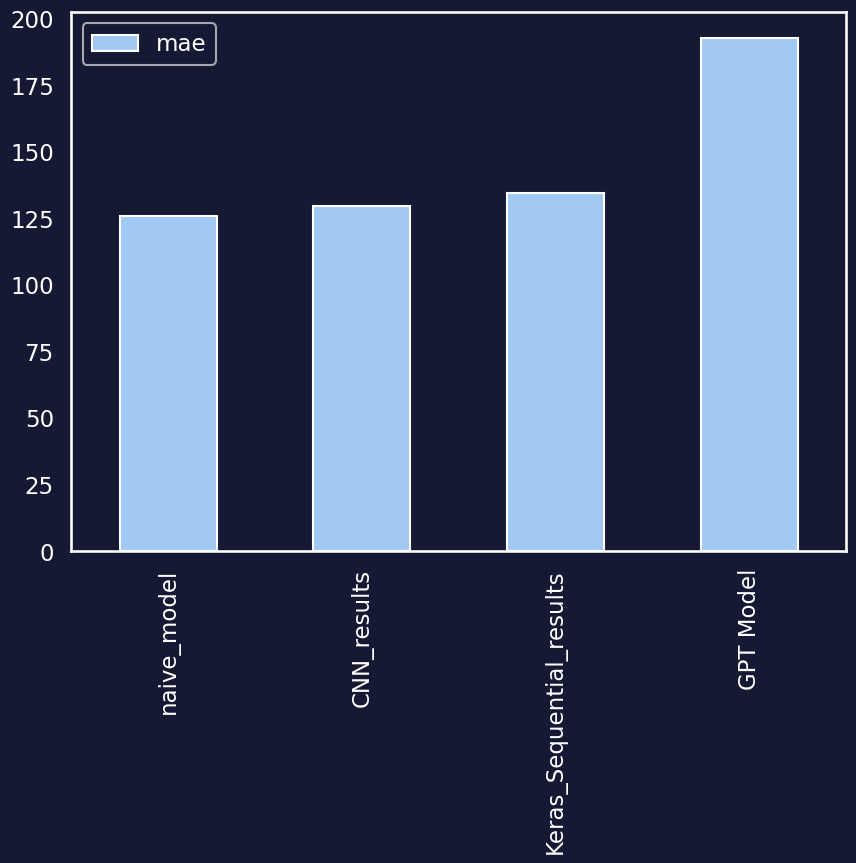

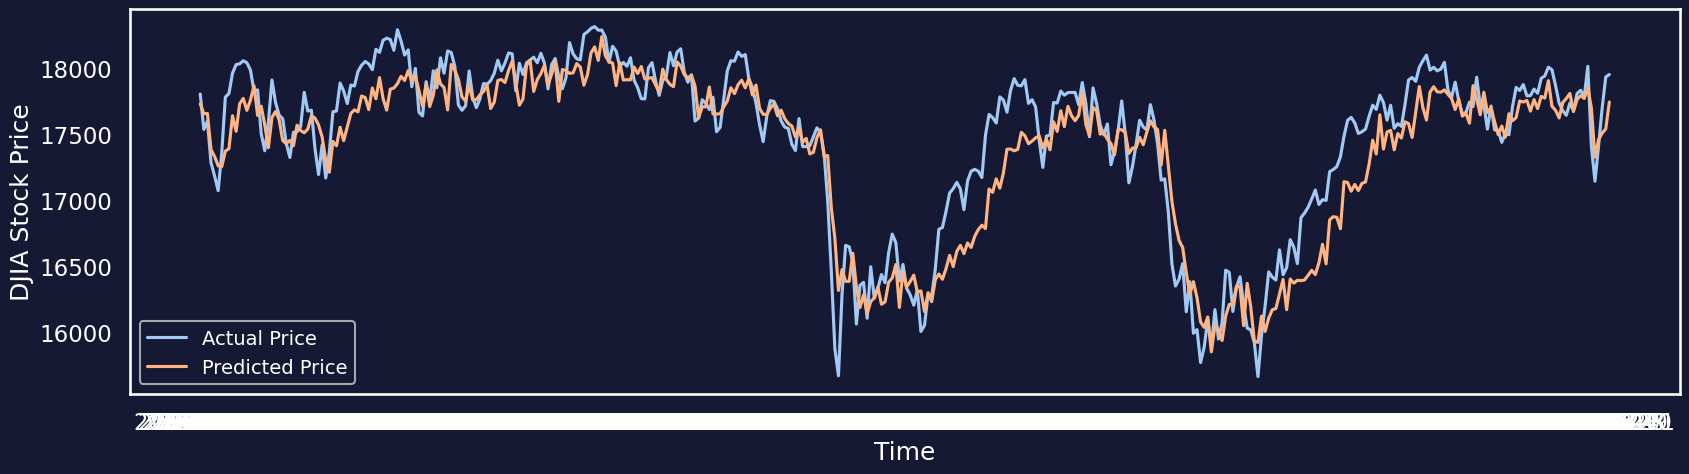

In [ ]:
# prompt: write furher code from here for more fine tuning to get low mae

# Further fine-tuning the GPT model
# Increase the number of epochs for fine-tuning
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=100, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_GPT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
gpt_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_GPT)
print(gpt_model_results)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_GPT, format="-", label="Predicted Price")
plt.grid(False)

# Hyperparameter tuning
# Experiment with different learning rates, batch sizes, and optimizers
# Use techniques like early stopping and model checkpointing to avoid overfitting and track progress

# Consider using a different pre-trained GPT model with larger capacity
# Explore other feature extraction methods from the GPT model, such as using the hidden states at different layers
# Incorporate other types of information, such as sentiment analysis or topic modeling, into the model


In [ ]:
# prompt: write further code for more fine tuning to change hyperparameter learning rate and etc

# Tune learning rate
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 32
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=50, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 100
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Tune other hyperparameters
# Experiment with different optimizers, such as RMSprop or Nadam
# Use techniques like early stopping and model checkpointing to avoid overfitting and track progress
# Consider using a different pre-trained GPT model with larger capacity
# Explore other feature extraction methods from the GPT model, such as using the hidden states at different layers
# Incorporate other types of information, such as sentiment analysis or topic modeling, into the model


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 535ms/step - loss: 1800.7333 - mae: 34.1252 - val_loss: 38244.3359 - val_mae: 151.1846
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - loss: 432.7235 - mae: 16.4290 - val_loss: 41882.3750 - val_mae: 160.1537
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 313.3180 - mae: 14.0159 - val_loss: 42923.2578 - val_mae: 162.6896
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 348.6112 - mae: 14.8978 - val_loss: 40734.8164 - val_mae: 157.3382
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 341.1963 - mae: 14.8658 - val_loss: 42486.5117 - val_mae: 161.6673
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 256.3379 - mae: 12.8004 - val_loss: 42746.2617 - val_mae: 162.3127
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 222.8419 - mae: 11.8312 - val_loss: 43495.6719 - val_mae: 164.2205
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 211.1258 - mae: 11.3819 - val_loss: 45543.2266 -

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 445ms/step - loss: 52223.6914 - mae: 179.6150
Test Mean Absolute Error: 187.35842895507812
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 552ms/step
{'mae': 187.35846, 'mse': 58118.0, 'rmse': 241.07675, 'mape': 1.0778314, 'mase': 1.4859029}


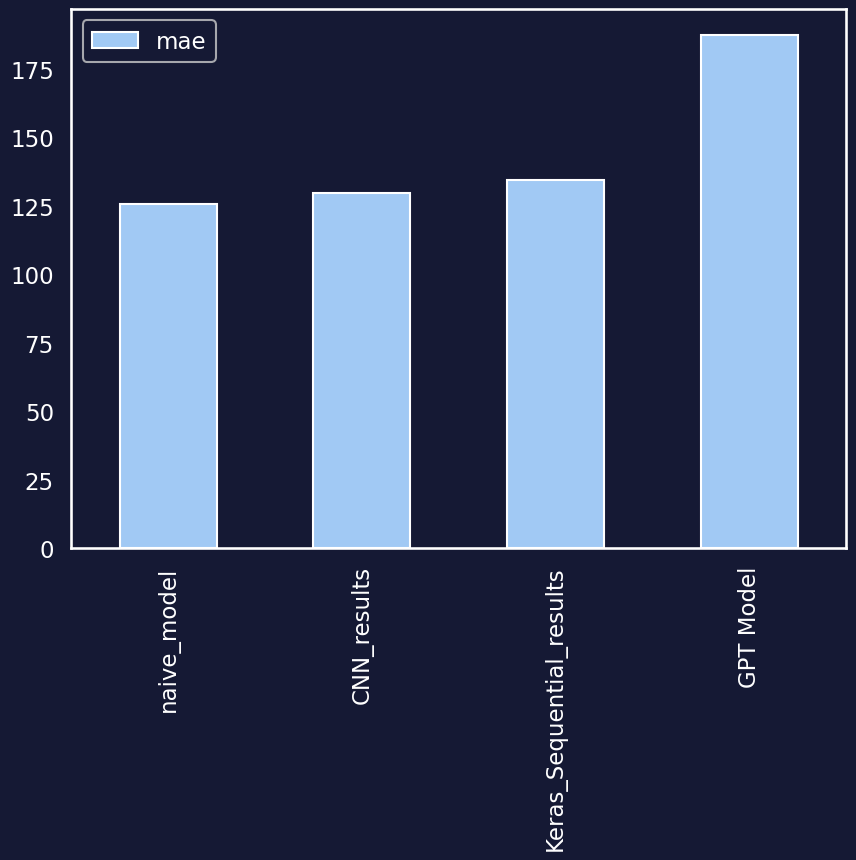

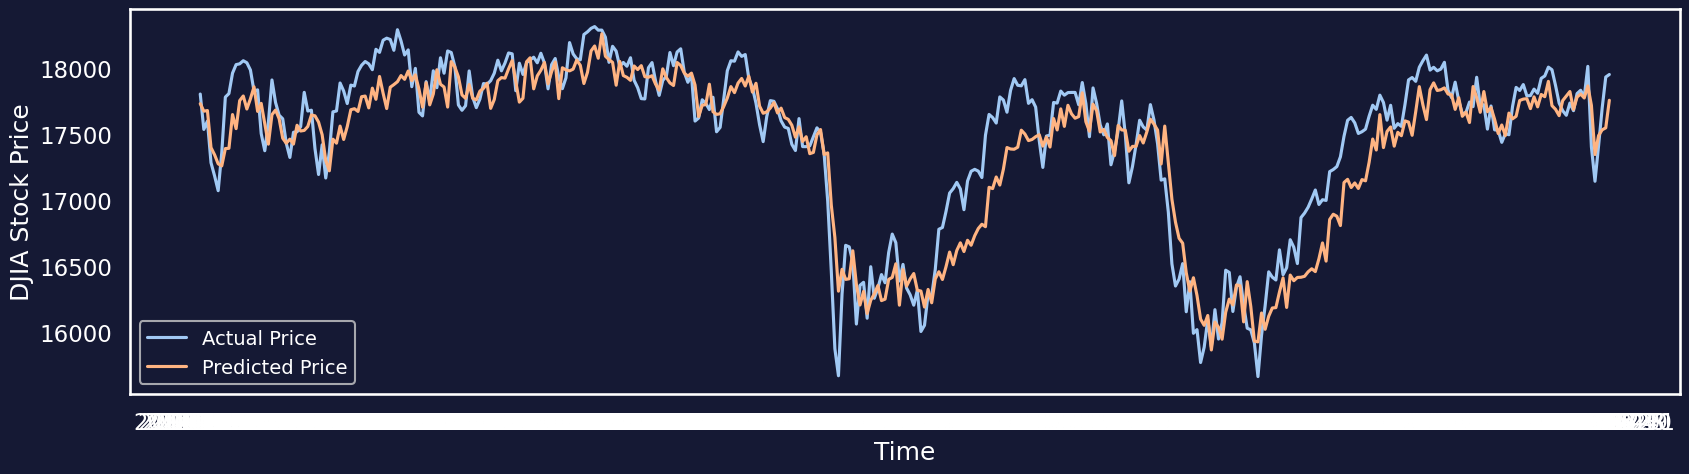

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_GPT = combined_model.predict([padded_corpus_test, x_test])

# Assuming evaluate_preds is a predefined function to evaluate predictions
gpt_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_GPT)
print(gpt_model_results)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_GPT, format="-", label="Predicted Price")
plt.grid(False)


In [ ]:
model_results

mae           mse        rmse      mape  \
naive_model               125.681572  27671.523438  166.347595  0.728094   
Keras_Sequential_results  134.296310  32268.914062  179.635498  0.778741   
CNN_results               129.549988  31140.451172  176.466568  0.751833   
GPT Model                 187.358459  58118.000000  241.076752  1.077831   

                              mase  
naive_model               0.998652  
Keras_Sequential_results  1.066684  
CNN_results               1.028985  
GPT Model                 1.485903

# BERT encoded + Dence Model

In [ ]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1575, 1575, 394, 394)

In [ ]:
X

MA7          MA20       MACD        20SD    upper_band  \
Date                                                                          
2008-09-08  11461.267160  11503.387402 -23.789161  151.597006  11806.581414   
2008-09-09  11392.060128  11475.806445 -29.334960  148.316713  11772.439871   
2008-09-10  11352.768694  11457.128955 -25.654980  149.737930  11756.604816   
2008-09-11  11340.881557  11452.166455  -7.070017  148.733794  11749.634043   
2008-09-12  11325.040179  11442.469483  10.050858  143.733062  11729.935607   
...                  ...           ...        ...         ...           ...   
2016-06-27  17663.235770  17767.995019 -44.865946  205.436138  18178.867296   
2016-06-28  17625.315848  17749.121094 -46.806466  220.375674  18189.872442   
2016-06-29  17609.574498  17744.371582 -26.720515  220.479360  18185.330302   
2016-06-30  17623.897321  17748.943066   5.517607  223.462769  18195.868604   
2016-07-01  17647.974330  17756.058496  31.932074  227.637403  18211.333301   

              lower_band           EMA  
Date                                    
2008-09-08  11200.193391  11423.314793  
2008-09-09  11179.173020  11294.925244  
2008-09-10  11157.653094  11277.588363  
2008-09-11  11154.698867  11381.669428  
2008-09-12  11155.003358  11408.549965  
...                  ...           ...  
2016-06-27  17357.122743  17286.702282  
2016-06-28  17308.369746  17368.714563  
2016-06-29  17303.412862  17586.024646  
2016-06-30  17302.017529  17815.335038  
2016-07-01  17300.783691  17904.691107  

[1969 rows x 7 columns]

In [ ]:
y

Close
Date                    
2008-09-08  11510.740234
2008-09-09  11230.730469
2008-09-10  11268.919922
2008-09-11  11433.709961
2008-09-12  11421.990234
...                  ...
2016-06-27  17140.240234
2016-06-28  17409.720703
2016-06-29  17694.679688
2016-06-30  17929.990234
2016-07-01  17949.369141

[1969 rows x 1 columns]

In [ ]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()

In [ ]:
## feature matrix
X_feature_new = [np.asarray(x_train, dtype='int32')]

In [ ]:
## feature matrix
X_feature_new_1 = [np.asarray(x_test, dtype='int32')]

In [ ]:

## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_train = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_train[0])

Padded Sequence: [  101  4108  2845 13297  2406 20911  2162  3338 14163  7377 11335  2546
 17727  5243  2818  3607  2651  5930 10123  4897  2148  9808 13462  2401
  8333  2954  7858  2845  4951  8353  2148  9808 13462  2401  7283  3143
  6033  4108  4893  2543 12632  2775  9040  7953  2436  5305  2095  2214
  9040  2845]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_test = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_test[0])

Padded Sequence: [  101  4831  2605  4654  9006 23041 21877  3527 24862  5619  5011  6449
  4424  3902  9454  2502  8246  2924  3627  4895  3726  4014  2047  3795
  3627  4652  2924  2502  8246 15358 23726 17678  2891 10556 27694 18384
  2644 22072  3477  3976  2101 21722  4424  3902  2879  4237  3375  2379
  3323  6709]


In [ ]:
# Check the number of samples in each dataset
print("Number of samples in x_test:", x_test.shape[0])
print("Number of samples in padded_corpus_test:", padded_corpus_test.shape[0])

Number of samples in x_test: 394
Number of samples in padded_corpus_test: 414


In [ ]:
min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])
# Trim or pad the datasets
x_test = x_test[:min_samples]
padded_corpus_test = padded_corpus_test[:min_samples]
# Now, attempt the concatenation again
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)
# Check the shape after concatenation
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_test_combined: (394, 57)


In [ ]:

import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (1575, 57)
Shape of x_test_combined: (394, 57)


In [ ]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1575, 1575, 394, 394)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input_ids            │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_attention_masks      │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_feature_extractor    │ (None, 50, 768)        │              0 │ text_input_ids[0][0],  │
│ (BERTFeatureExtractor)    │                        │                │ text_attention_masks[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 7)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 38400)          │              0 │ bert_feature_extracto… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 38407)          │              0 │ numerical_input[0][0], │
│ (Concatenate)             │                        │                │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 256)            │      9,832,448 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 128)            │         32,896 │ dense_25[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 64)             │          8,256 │ dense_26[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 1)              │             65 │ dense_27[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,873,665 (37.67 MB)

 Trainable params: 9,873,665 (37.67 MB)

 Non-trainable params: 0 (0.00 B)

x_test_np shape: (394, 7)
padded_corpus_test_np shape: (414, 50)
attention_masks_test_np shape: (414, 50)
y_test shape: (394, 1)
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 54s 864ms/step - loss: 51693064.0000 - mae: 6053.9785 - val_loss: 282379.5938 - val_mae: 485.9720
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - loss: 586731.8750 - mae: 650.6942 - val_loss: 524397.6875 - val_mae: 689.8792
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 107931.6719 - mae: 249.1804 - val_loss: 280737.5938 - val_mae: 491.5518
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 92050.4062 - mae: 223.5091 - val_loss: 261423.8906 - val_mae: 473.7648
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 91338.3516 - mae: 224.3051 - val_loss: 245161.7500 - val_mae: 457.7983
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 574ms/step - loss: 297349.7188 - mae: 504.2525
Test Mean Absolute Error: 507.29248046875


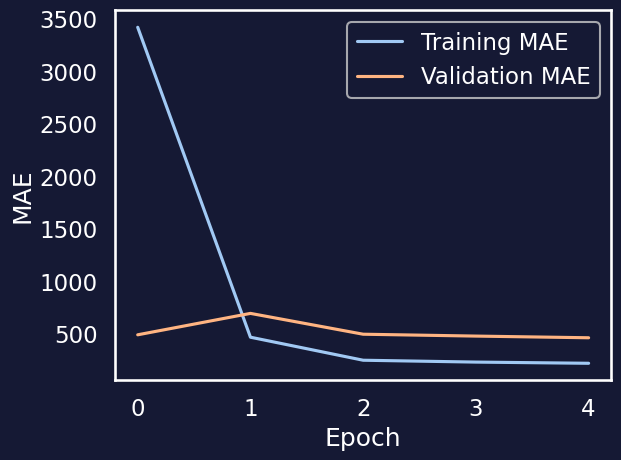

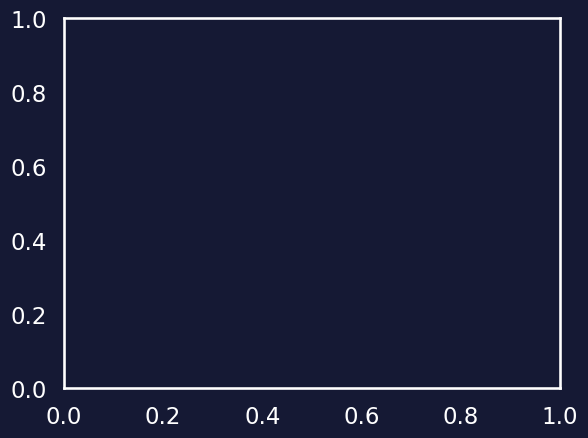

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Concatenate, Input
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your data is already in numpy format
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
bert_model = TFBertModel.from_pretrained(model_name)

# Tokenize and pad the training and testing text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

max_length = 50  # Maximum length for padding/truncating sequences
padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Define input shapes
numerical_input_shape = x_train.shape[1]
text_input_shape = max_length

# Define the custom layer for BERT
class BERTFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BERTFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_masks = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_masks)
        return outputs.last_hidden_state

# Define the numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Define the text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Use the custom layer to get BERT features
bert_features = BERTFeatureExtractor(bert_model)([text_input_ids, text_attention_masks])

# Flatten the BERT output
text_embedding_flat = Flatten()(bert_features)

# Concatenate numerical and text features
combined_input = Concatenate()([numerical_input, text_embedding_flat])

# Dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Create the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Compile the model
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
combined_model.summary()

# Convert inputs to NumPy arrays
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
padded_corpus_train_np = np.array(padded_corpus_train)
padded_corpus_test_np = np.array(padded_corpus_test)
attention_masks_train_np = np.array(attention_masks_train)
attention_masks_test_np = np.array(attention_masks_test)

# Print shapes to debug the issue
print(f'x_test_np shape: {x_test_np.shape}')
print(f'padded_corpus_test_np shape: {padded_corpus_test_np.shape}')
print(f'attention_masks_test_np shape: {attention_masks_test_np.shape}')
print(f'y_test shape: {y_test.shape}')

# Trimming padded_corpus_test_np and attention_masks_test_np to match x_test_np and y_test
padded_corpus_test_np = padded_corpus_test_np[:x_test_np.shape[0]]
attention_masks_test_np = attention_masks_test_np[:x_test_np.shape[0]]

# Ensure the number of samples matches across all inputs
assert x_train_np.shape[0] == padded_corpus_train_np.shape[0] == attention_masks_train_np.shape[0] == y_train.shape[0], "Train input shapes do not match"
assert x_test_np.shape[0] == padded_corpus_test_np.shape[0] == attention_masks_test_np.shape[0] == y_test.shape[0], "Test input shapes do not match"

# Train the model
history = combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()
plt.grid(False)


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 795ms/step
{'mae': 507.2925, 'mse': 300644.28, 'rmse': 548.31036, 'mape': 2.88898, 'mase': 4.0232363}


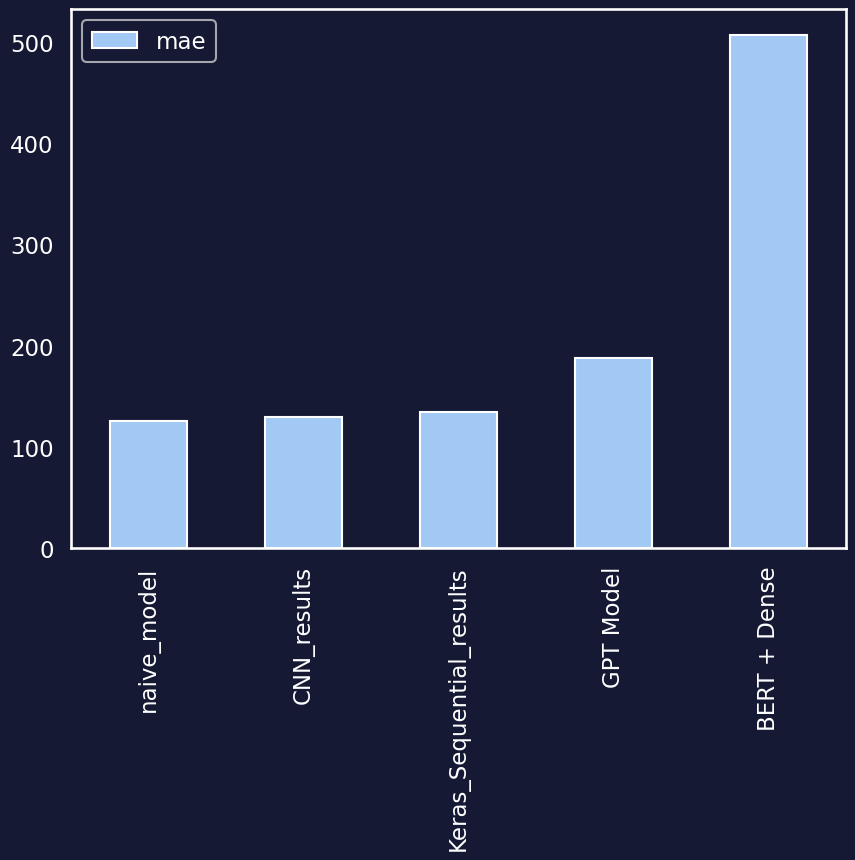

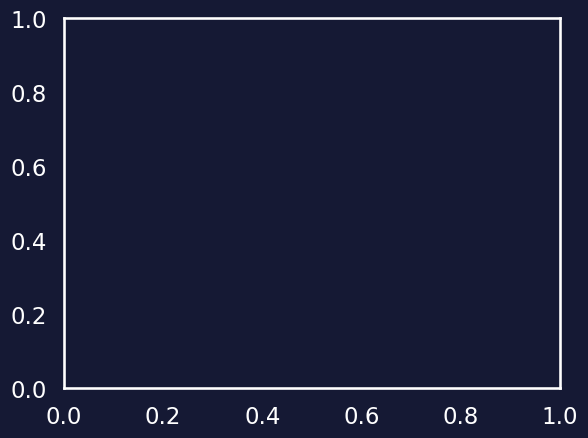

In [ ]:
# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results)

# Assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "Keras_Sequential_results": Keras_Sequential_Model_results,
    "CNN_results": CNN_model_results,
    "GPT Model": gpt_model_results,
    "BERT + Dense": BERT_dense_model_results
}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()
plt.grid(False)

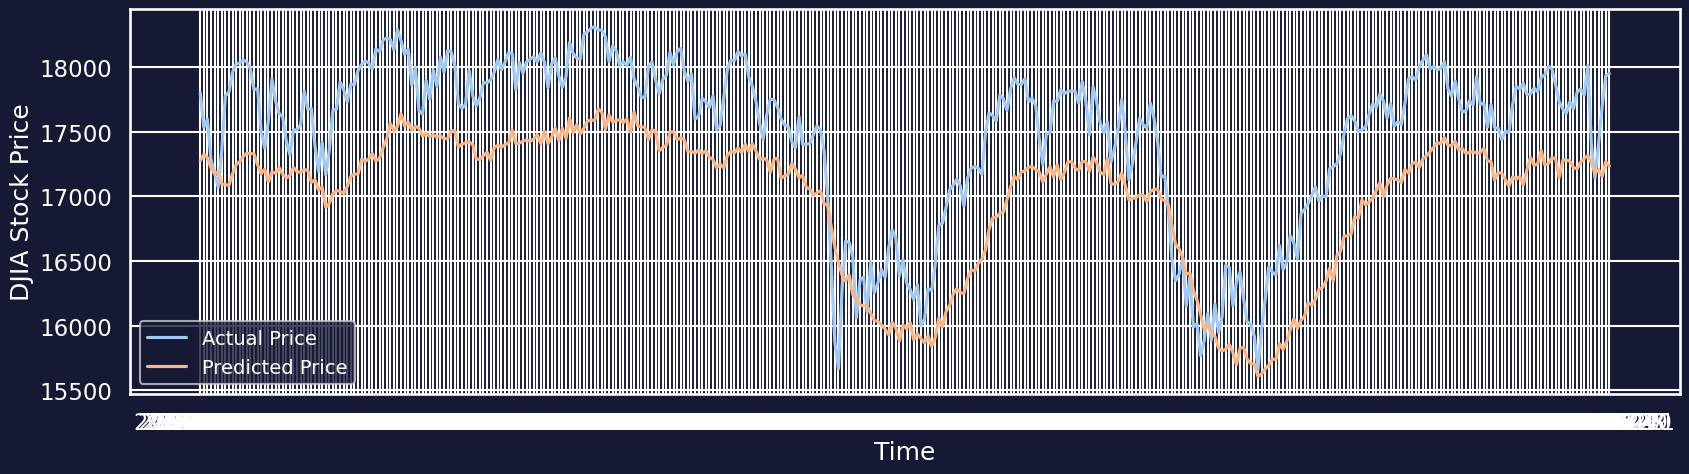

mae            mse        rmse      mape  \
naive_model               125.681572   27671.523438  166.347595  0.728094   
Keras_Sequential_results  134.296310   32268.914062  179.635498  0.778741   
CNN_results               129.549988   31140.451172  176.466568  0.751833   
GPT Model                 187.358459   58118.000000  241.076752  1.077831   
BERT + Dense              507.292511  300644.281250  548.310364  2.888980   

                              mase  
naive_model               0.998652  
Keras_Sequential_results  1.066684  
CNN_results               1.028985  
GPT Model                 1.485903  
BERT + Dense              4.023236

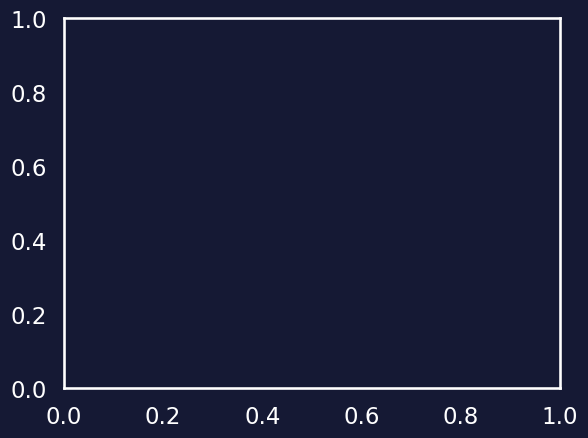

In [ ]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price")
plt.show()
plt.grid(False)
# Compare model results
model_results


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 56s 897ms/step - loss: 72120.1250 - mae: 200.6391 - val_loss: 210613.1094 - val_mae: 421.3588
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - loss: 77165.9844 - mae: 204.9719 - val_loss: 203735.4844 - val_mae: 413.8712
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 71641.1953 - mae: 198.7429 - val_loss: 196714.9219 - val_mae: 406.0655
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 81484.4688 - mae: 209.2547 - val_loss: 179571.8125 - val_mae: 386.3670
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 71201.5391 - mae: 197.7281 - val_loss: 185718.5781 - val_mae: 393.5933
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 67152.1484 - mae: 188.3906 - val_loss: 202257.1406 - val_mae: 412.4053
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 79733.8281 - mae: 205.2385 - val_loss: 164644.6406 - val_mae: 368.3528
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 80987.1172 - mae: 208

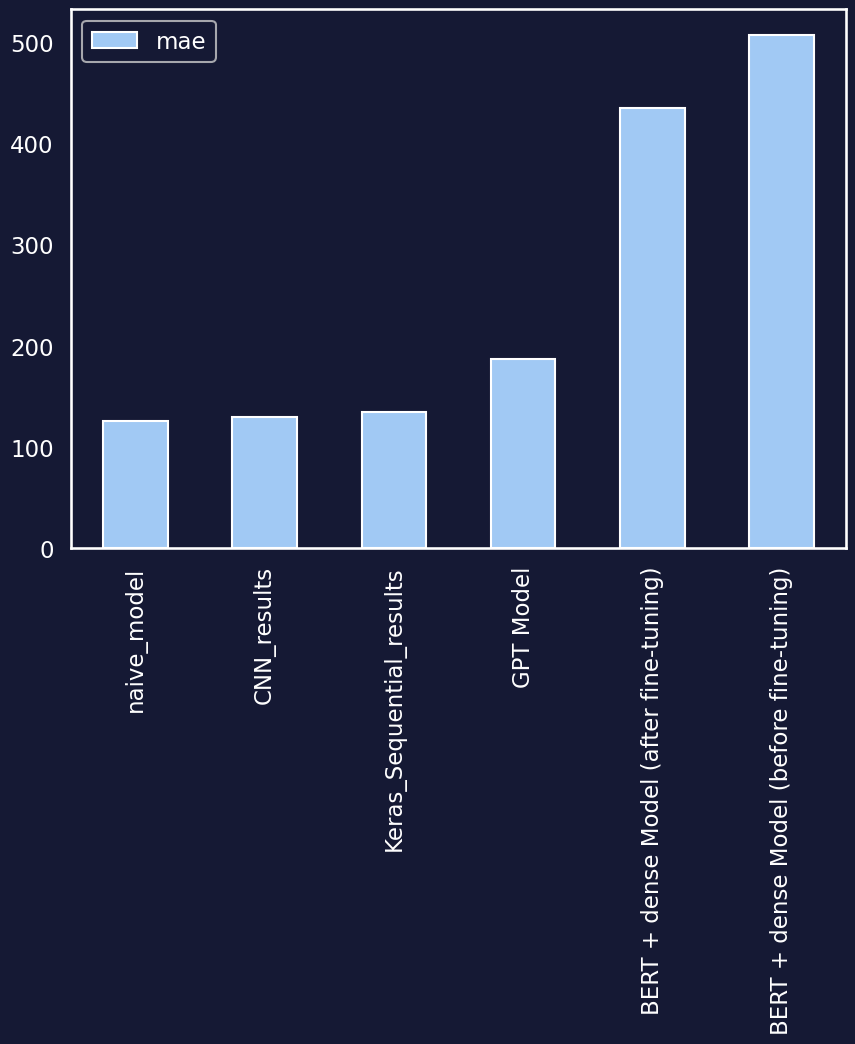

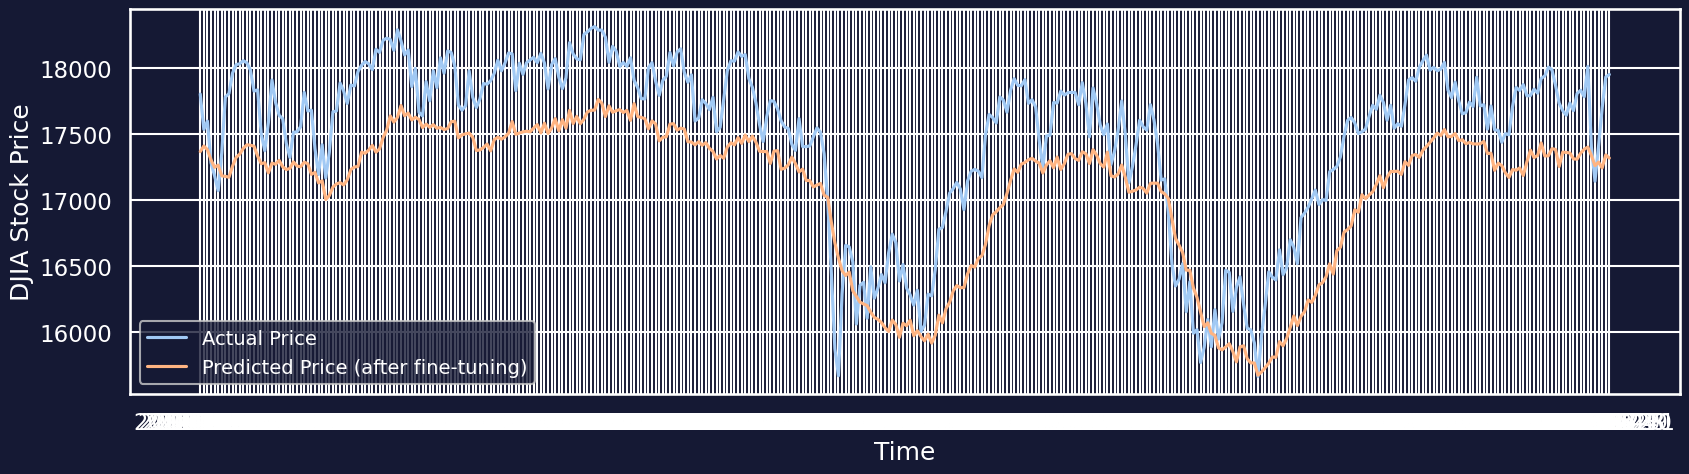

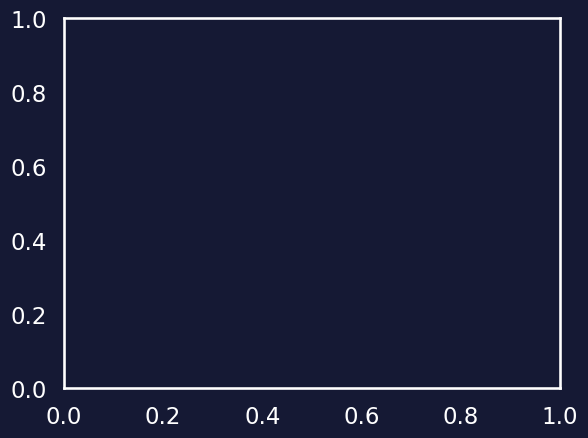

In [ ]:
# Fine-tuning the BERT model
# Assuming you have already loaded the BERT model and tokenizer, and prepared your training and test datasets

# Freeze the first few layers of the BERT model to improve training efficiency
for layer in bert_model.layers[:6]:
    layer.trainable = False

# Compile the model with a lower learning rate for fine-tuning
combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6), loss='mean_squared_error', metrics=['mae'])

# Train the model for a few more epochs with the new learning rate
history = combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the fine-tuned model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error after fine-tuning: {test_mae}')

# Predict on the test set with the fine-tuned model
predictions_BERT_fine_tuned = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results_fine_tuned = evaluate_preds(y_true=y_test, y_pred=predictions_BERT_fine_tuned)
print(BERT_dense_model_results_fine_tuned)

# Compare model results before and after fine-tuning
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results,
                              "BERT + dense Model (before fine-tuning)": BERT_dense_model_results,
                              "BERT + dense Model (after fine-tuning)": BERT_dense_model_results_fine_tuned}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT_fine_tuned, format="-", label="Predicted Price (after fine-tuning)")
plt.show()
plt.grid(False)


In [ ]:
model_results

mae            mse  \
naive_model                              125.681572   27671.523438   
Keras_Sequential_results                 134.296310   32268.914062   
CNN_results                              129.549988   31140.451172   
GPT Model                                187.358459   58118.000000   
BERT + dense Model (before fine-tuning)  507.292511  300644.281250   
BERT + dense Model (after fine-tuning)   434.784515  228075.875000   

                                               rmse      mape      mase  
naive_model                              166.347595  0.728094  0.998652  
Keras_Sequential_results                 179.635498  0.778741  1.066684  
CNN_results                              176.466568  0.751833  1.028985  
GPT Model                                241.076752  1.077831  1.485903  
BERT + dense Model (before fine-tuning)  548.310364  2.888980  4.023236  
BERT + dense Model (after fine-tuning)   477.572906  2.478056  3.448190

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - loss: 67574.4375 - mae: 192.5269 - val_loss: 178514.2031 - val_mae: 385.4428
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - loss: 63044.5586 - mae: 189.5441 - val_loss: 171478.6562 - val_mae: 377.0653
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - loss: 62013.2148 - mae: 184.9513 - val_loss: 149364.7969 - val_mae: 349.2805
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 65406.8867 - mae: 186.5364 - val_loss: 123433.5000 - val_mae: 314.3213
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - loss: 63942.2266 - mae: 180.3106 - val_loss: 103002.3750 - val_mae: 284.1380
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - loss: 57240.6172 - mae: 176.9228 - val_loss: 139567.1562 - val_mae: 336.4337
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - loss: 54647.0117 - mae: 174.8739 - val_loss: 104422.7266 - val_mae: 286.1759
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 53467.6016 - mae: 172.505

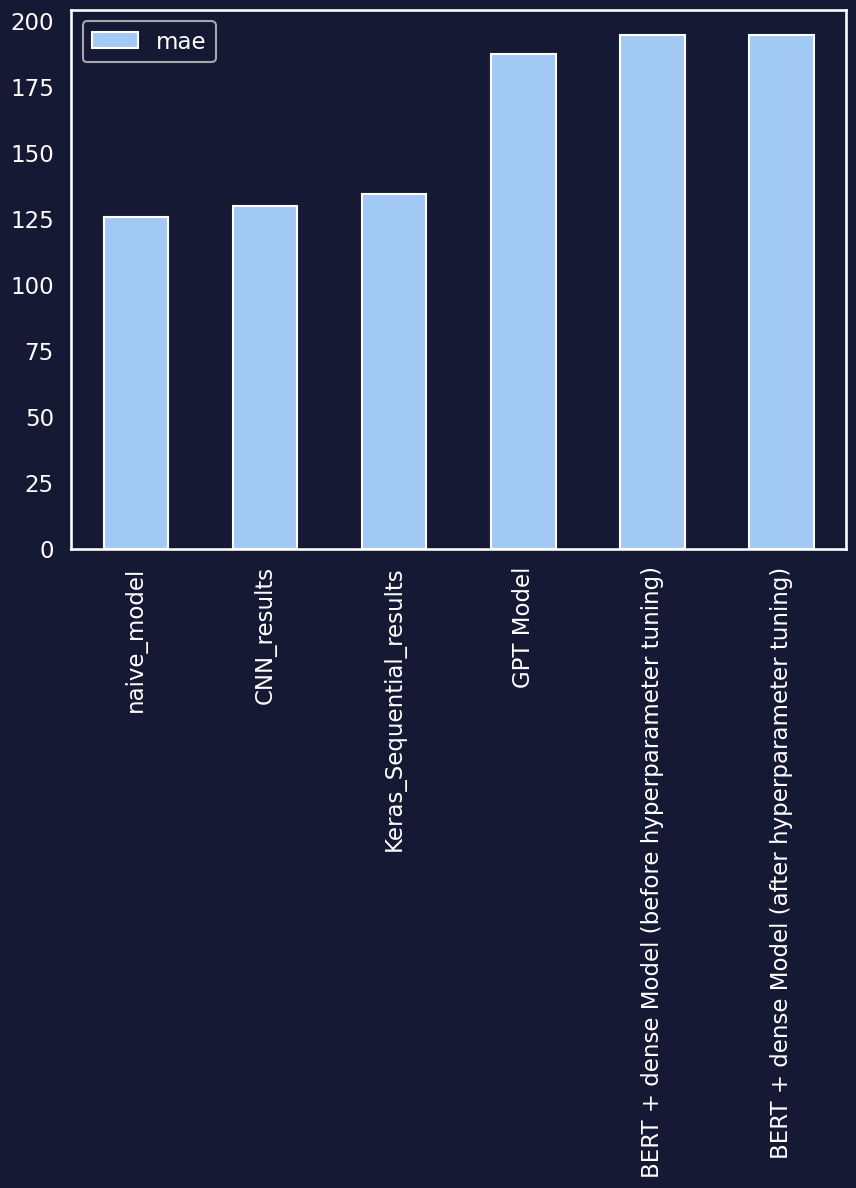

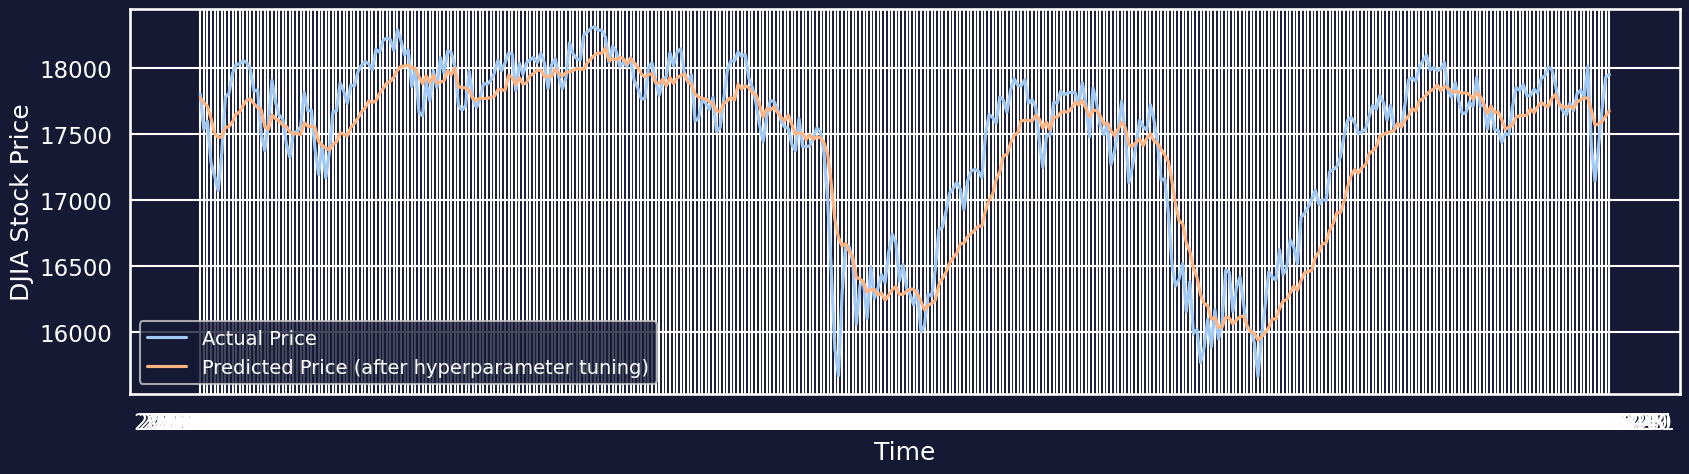

mae           mse  \
naive_model                                        125.681572  27671.523438   
Keras_Sequential_results                           134.296310  32268.914062   
CNN_results                                        129.549988  31140.451172   
GPT Model                                          187.358459  58118.000000   
BERT + dense Model (before hyperparameter tuning)  194.305557  62116.722656   
BERT + dense Model (after hyperparameter tuning)   194.305557  62116.722656   

                                                         rmse      mape  \
naive_model                                        166.347595  0.728094   
Keras_Sequential_results                           179.635498  0.778741   
CNN_results                                        176.466568  0.751833   
GPT Model                                          241.076752  1.077831   
BERT + dense Model (before hyperparameter tuning)  249.232269  1.121808   
BERT + dense Model (after hyperparameter tuning)   249.232269  1.121808   

                                                       mase  
naive_model                                        0.998652  
Keras_Sequential_results                           1.066684  
CNN_results                                        1.028985  
GPT Model                                          1.485903  
BERT + dense Model (before hyperparameter tuning)  1.540999  
BERT + dense Model (after hyperparameter tuning)   1.540999

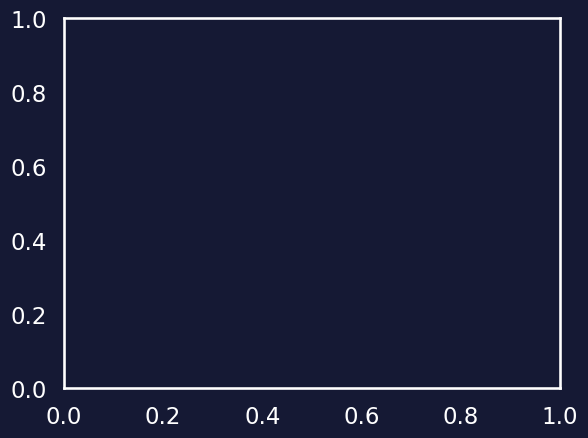

In [ ]:
# prompt: write code from here for low mae change hyperparameter and learning rate

# Tune learning rate
learning_rate = 0.00005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 64
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 20
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Tune other hyperparameters
# Experiment with different optimizers, such as RMSprop or Nadam
# Use techniques like early stopping and model checkpointing to avoid overfitting and track progress
# Consider using a different pre-trained BERT model with larger capacity
# Explore other feature extraction methods from the BERT model, such as using the hidden states at different layers
# Incorporate other types of information, such as sentiment analysis or topic modeling, into the model

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results)

# Compare model results before and after hyperparameter tuning
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results,
                              "BERT + dense Model (before hyperparameter tuning)": BERT_dense_model_results,
                              "BERT + dense Model (after hyperparameter tuning)": BERT_dense_model_results}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price (after hyperparameter tuning)")
plt.show()
plt.grid(False)

model_results


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - loss: 37534.6875 - mae: 145.1418 - val_loss: 43574.2812 - val_mae: 165.3611
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 401ms/step - loss: 37755.0469 - mae: 144.7288 - val_loss: 41841.5859 - val_mae: 160.4631
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 460ms/step - loss: 36123.3008 - mae: 143.6745 - val_loss: 41965.3984 - val_mae: 160.8367
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - loss: 34993.0234 - mae: 144.0157 - val_loss: 43387.8867 - val_mae: 164.8878
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 409ms/step - loss: 36434.9727 - mae: 143.2380 - val_loss: 40810.3320 - val_mae: 157.4416
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - loss: 37912.6133 - mae: 144.5736 - val_loss: 42759.7344 - val_mae: 163.1557
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step - loss: 36481.9883 - mae: 140.7100 - val_loss: 42339.3203 - val_mae: 161.9746
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 462ms/step - loss: 36433.4062 - mae: 143.5837 - va

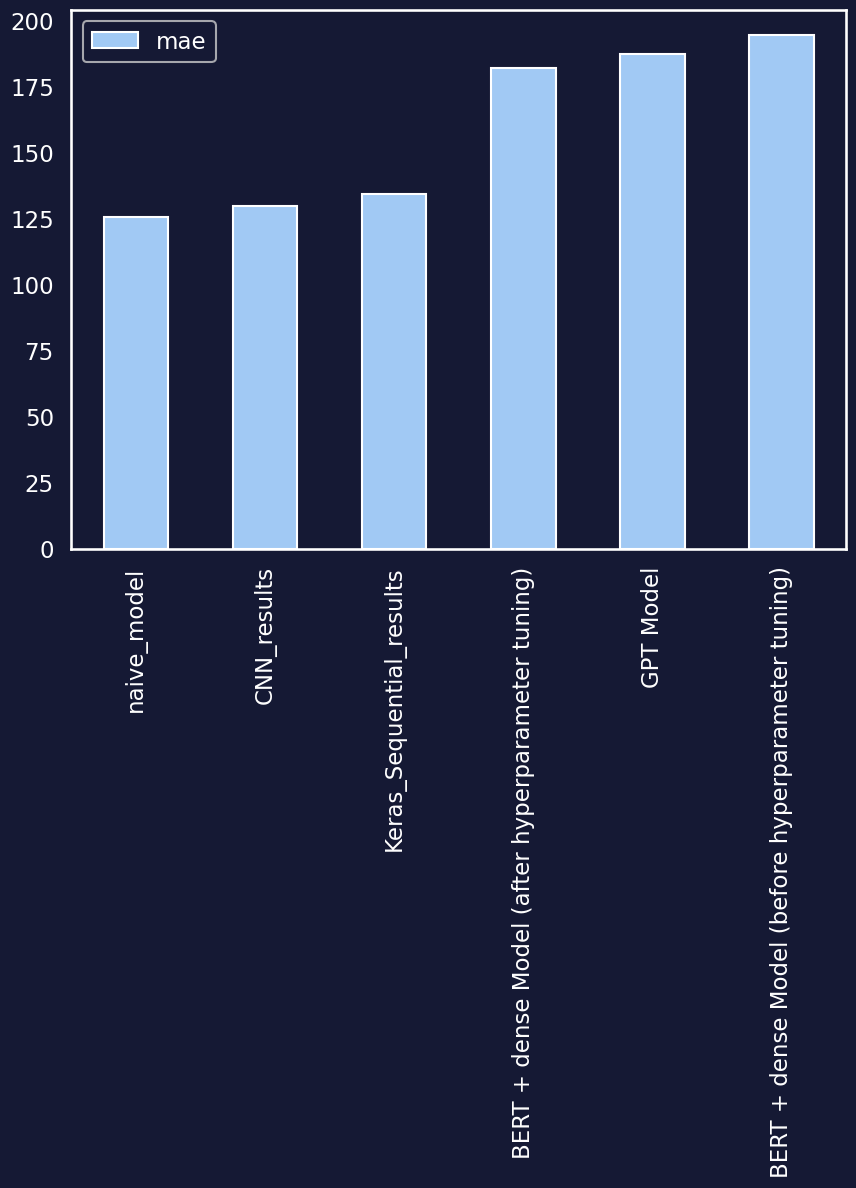

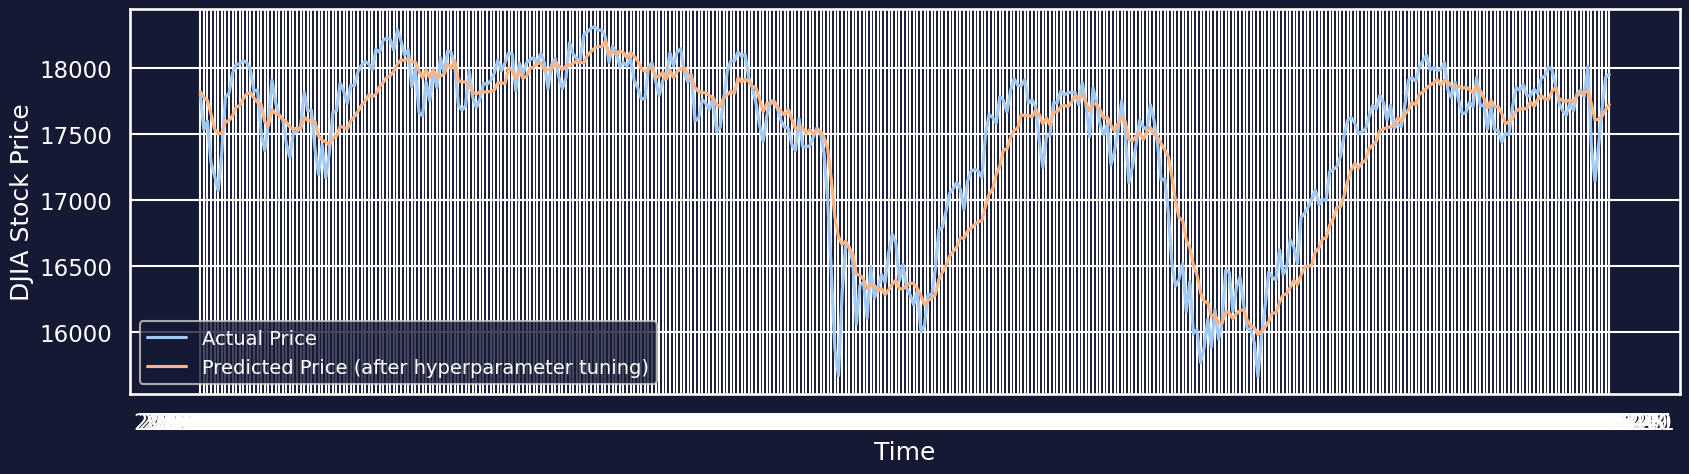

mae           mse  \
naive_model                                        125.681572  27671.523438   
Keras_Sequential_results                           134.296310  32268.914062   
CNN_results                                        129.549988  31140.451172   
GPT Model                                          187.358459  58118.000000   
BERT + dense Model (before hyperparameter tuning)  194.305557  62116.722656   
BERT + dense Model (after hyperparameter tuning)   181.745499  55395.140625   

                                                         rmse      mape  \
naive_model                                        166.347595  0.728094   
Keras_Sequential_results                           179.635498  0.778741   
CNN_results                                        176.466568  0.751833   
GPT Model                                          241.076752  1.077831   
BERT + dense Model (before hyperparameter tuning)  249.232269  1.121808   
BERT + dense Model (after hyperparameter tuning)   235.361725  1.051896   

                                                       mase  
naive_model                                        0.998652  
Keras_Sequential_results                           1.066684  
CNN_results                                        1.028985  
GPT Model                                          1.485903  
BERT + dense Model (before hyperparameter tuning)  1.540999  
BERT + dense Model (after hyperparameter tuning)   1.441388

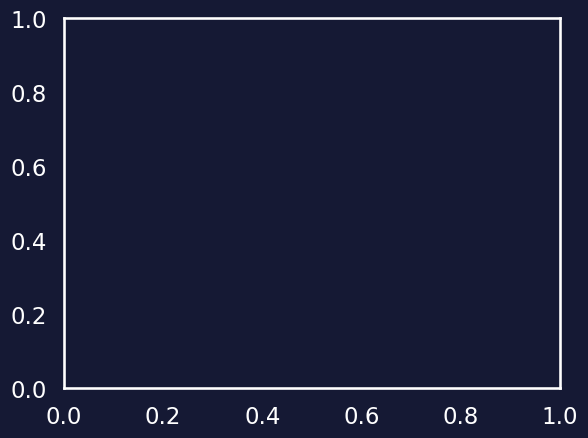

In [ ]:
# prompt: write code from here for low mae change hyperparameter and learning rate

# Tune learning rate
learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 128
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 30
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results_after = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results_after)

# Compare model results before and after hyperparameter tuning
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results,
                              "BERT + dense Model (before hyperparameter tuning)": BERT_dense_model_results,
                              "BERT + dense Model (after hyperparameter tuning)": BERT_dense_model_results_after}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price (after hyperparameter tuning)")
plt.show()
plt.grid(False)

model_results


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 9s/step - loss: 32264.5547 - mae: 135.6367 - val_loss: 39663.2266 - val_mae: 154.7110
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 851ms/step - loss: 35486.9062 - mae: 141.1468 - val_loss: 40228.2773 - val_mae: 156.4437
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 856ms/step - loss: 33708.7578 - mae: 142.3300 - val_loss: 38248.7227 - val_mae: 150.3897
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 983ms/step - loss: 34419.0898 - mae: 140.1782 - val_loss: 39418.7383 - val_mae: 153.9891
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 865ms/step - loss: 33400.8906 - mae: 138.5110 - val_loss: 39971.6172 - val_mae: 155.6734
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 975ms/step - loss: 35655.3945 - mae: 143.0538 - val_loss: 38734.2852 - val_mae: 151.9094
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 869ms/step - loss: 33090.1250 - mae: 137.2379 - val_loss: 38819.9297 - val_mae: 152.1786
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 870ms/step - loss: 35898.8945 - mae: 141.3425 - val_loss: 39506.68

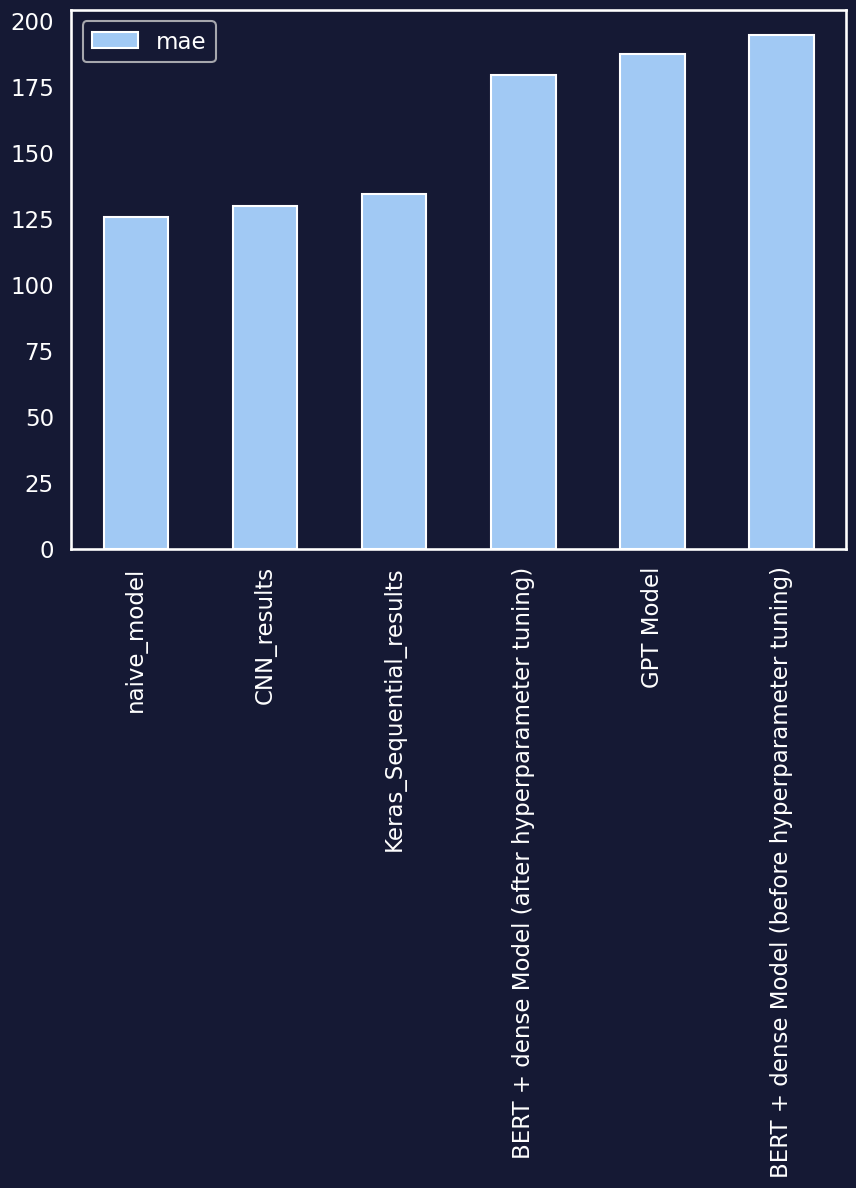

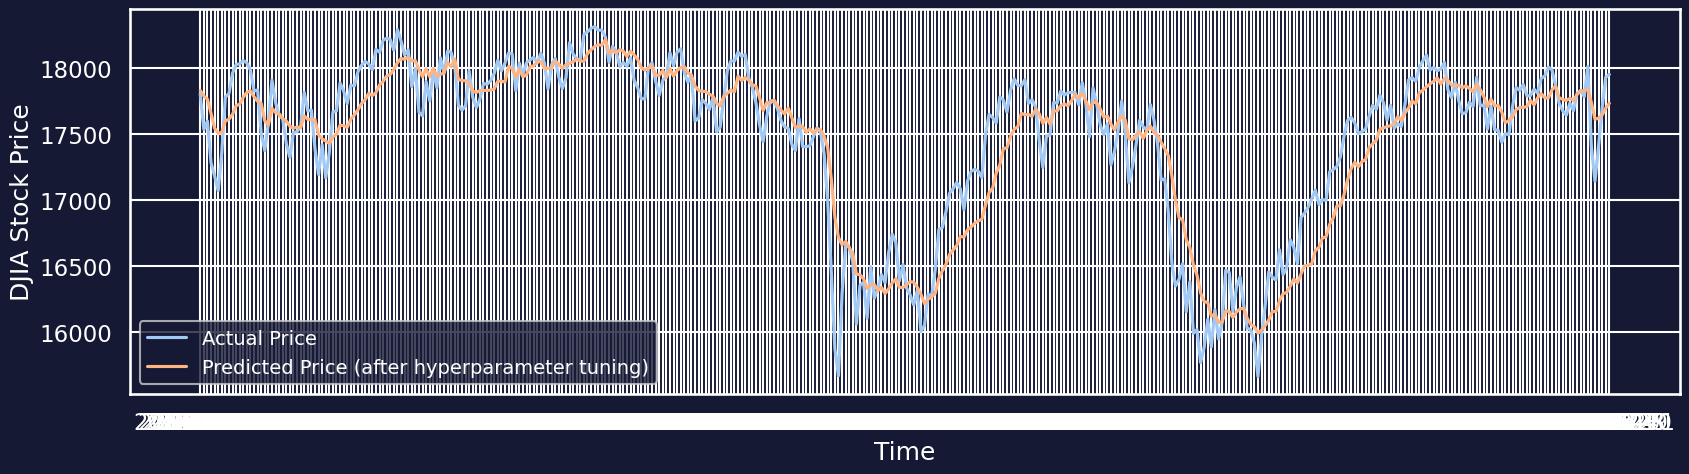

mae           mse  \
naive_model                                        125.681572  27671.523438   
Keras_Sequential_results                           134.296310  32268.914062   
CNN_results                                        129.549988  31140.451172   
GPT Model                                          187.358459  58118.000000   
BERT + dense Model (before hyperparameter tuning)  194.305557  62116.722656   
BERT + dense Model (after hyperparameter tuning)   179.221710  54088.488281   

                                                         rmse      mape  \
naive_model                                        166.347595  0.728094   
Keras_Sequential_results                           179.635498  0.778741   
CNN_results                                        176.466568  0.751833   
GPT Model                                          241.076752  1.077831   
BERT + dense Model (before hyperparameter tuning)  249.232269  1.121808   
BERT + dense Model (after hyperparameter tuning)   232.569321  1.037794   

                                                       mase  
naive_model                                        0.998652  
Keras_Sequential_results                           1.066684  
CNN_results                                        1.028985  
GPT Model                                          1.485903  
BERT + dense Model (before hyperparameter tuning)  1.540999  
BERT + dense Model (after hyperparameter tuning)   1.421372

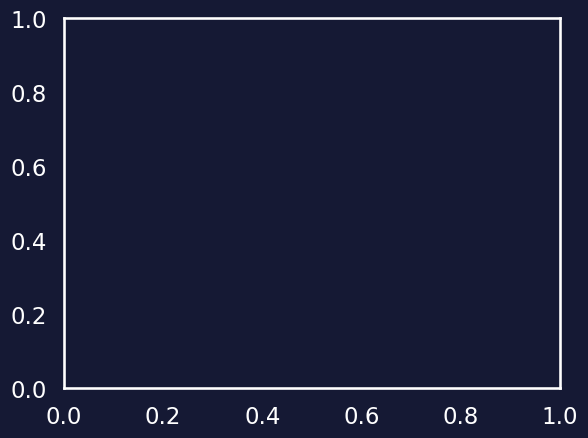

In [ ]:
# prompt: write code from here for low mae change hyperparameter and learning rate

# Tune learning rate
learning_rate = 0.000005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 256
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 40
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results_after = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results_after)

# Compare model results before and after hyperparameter tuning
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results,
                              "BERT + dense Model (before hyperparameter tuning)": BERT_dense_model_results,
                              "BERT + dense Model (after hyperparameter tuning)": BERT_dense_model_results_after}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price (after hyperparameter tuning)")
plt.show()
plt.grid(False)

model_results


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 46s 10s/step - loss: 33930.0781 - mae: 137.8737 - val_loss: 38364.7383 - val_mae: 151.1465
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 34283.4062 - mae: 140.5089 - val_loss: 38303.7539 - val_mae: 150.9622
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 32341.7227 - mae: 137.4771 - val_loss: 38134.6836 - val_mae: 150.4406
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 34269.5039 - mae: 139.3862 - val_loss: 38277.1172 - val_mae: 150.8828
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 34204.5859 - mae: 140.0439 - val_loss: 38363.4766 - val_mae: 151.1473
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 32789.6055 - mae: 137.7513 - val_loss: 38324.2852 - val_mae: 151.0296
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 33167.8984 - mae: 136.6375 - val_loss: 38259.6680 - val_mae: 150.8334
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 33516.1094 - mae: 138.6881 - val_loss: 38290.3633 - val_mae: 150.92

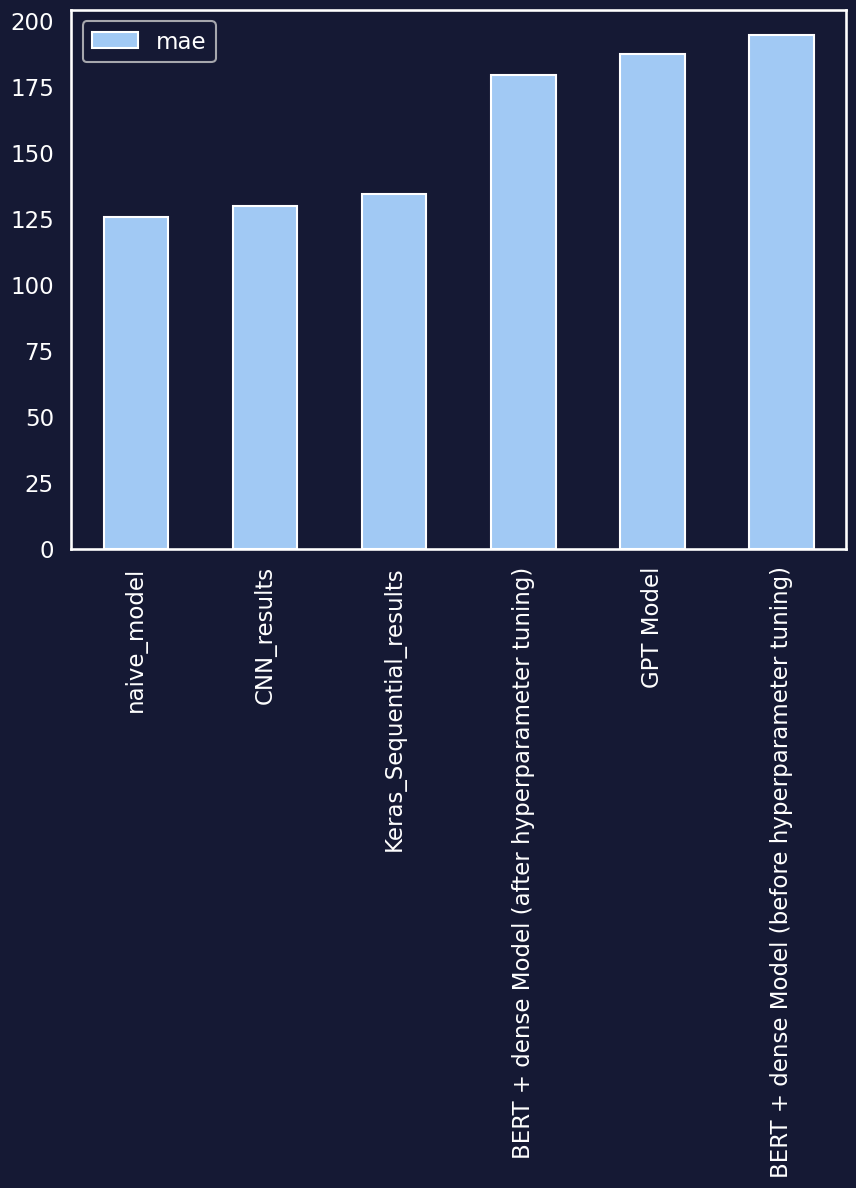

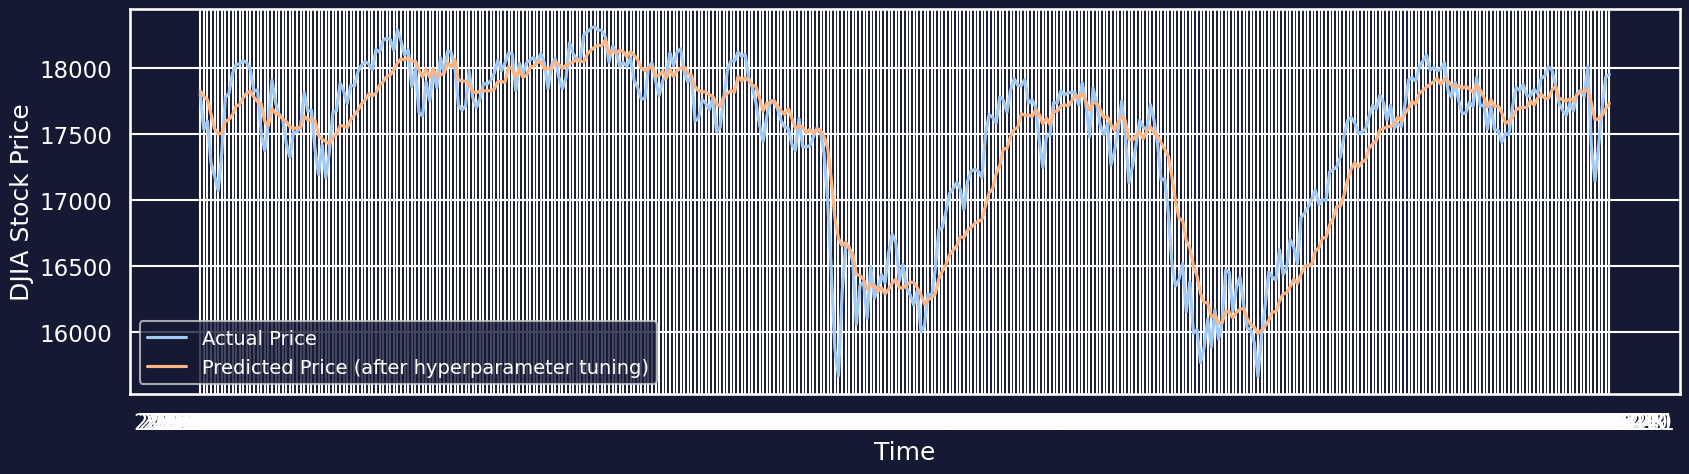

mae           mse  \
naive_model                                        125.681572  27671.523438   
Keras_Sequential_results                           134.296310  32268.914062   
CNN_results                                        129.549988  31140.451172   
GPT Model                                          187.358459  58118.000000   
BERT + dense Model (before hyperparameter tuning)  194.305557  62116.722656   
BERT + dense Model (after hyperparameter tuning)   179.459259  54145.660156   

                                                         rmse      mape  \
naive_model                                        166.347595  0.728094   
Keras_Sequential_results                           179.635498  0.778741   
CNN_results                                        176.466568  0.751833   
GPT Model                                          241.076752  1.077831   
BERT + dense Model (before hyperparameter tuning)  249.232269  1.121808   
BERT + dense Model (after hyperparameter tuning)   232.692200  1.038952   

                                                       mase  
naive_model                                        0.998652  
Keras_Sequential_results                           1.066684  
CNN_results                                        1.028985  
GPT Model                                          1.485903  
BERT + dense Model (before hyperparameter tuning)  1.540999  
BERT + dense Model (after hyperparameter tuning)   1.423256

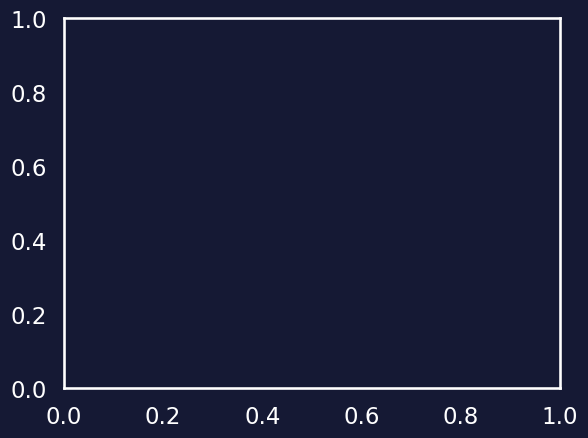

In [ ]:
# prompt: write code from here for low mae change hyperparameter and learning rate

# Tune learning rate
learning_rate = 0.000001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 512
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 50
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results_after = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results_after)

# Compare model results before and after hyperparameter tuning
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results,
                              "BERT + dense Model (before hyperparameter tuning)": BERT_dense_model_results,
                              "BERT + dense Model (after hyperparameter tuning)": BERT_dense_model_results_after}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price (after hyperparameter tuning)")
plt.show()
plt.grid(False)

model_results


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 48s 16s/step - loss: 33619.9102 - mae: 138.2722 - val_loss: 38278.6367 - val_mae: 150.9625
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 33425.7617 - mae: 137.9767 - val_loss: 38195.1523 - val_mae: 150.7082
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 32883.2266 - mae: 137.8120 - val_loss: 38187.6680 - val_mae: 150.6857
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 33098.1016 - mae: 137.5039 - val_loss: 38141.1016 - val_mae: 150.5426
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 33203.5820 - mae: 137.6680 - val_loss: 38081.3438 - val_mae: 150.3577
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 33538.8086 - mae: 138.3304 - val_loss: 38025.0781 - val_mae: 150.1853
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 33226.8906 - mae: 137.2440 - val_loss: 37958.5352 - val_mae: 149.9854
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 33528.1016 - mae: 137.9328 - val_loss: 37903.6875 - val_mae: 149.82

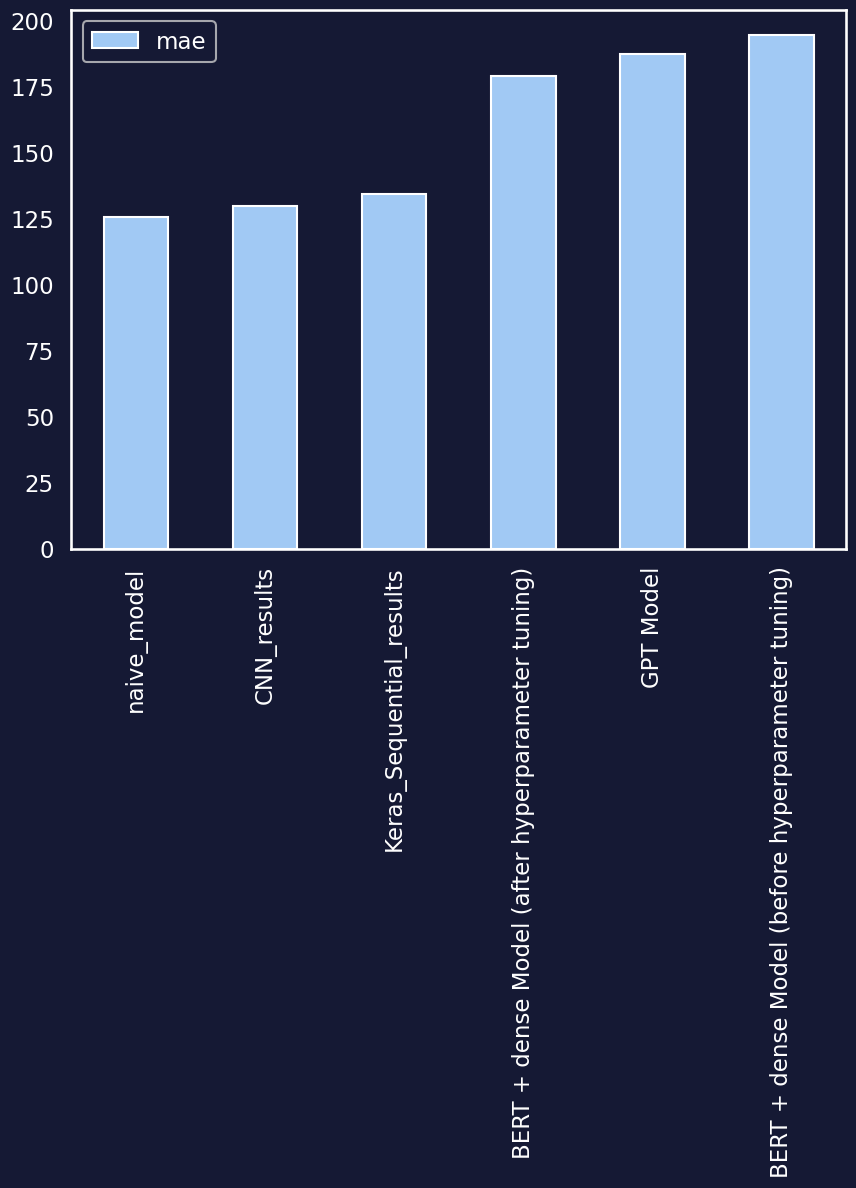

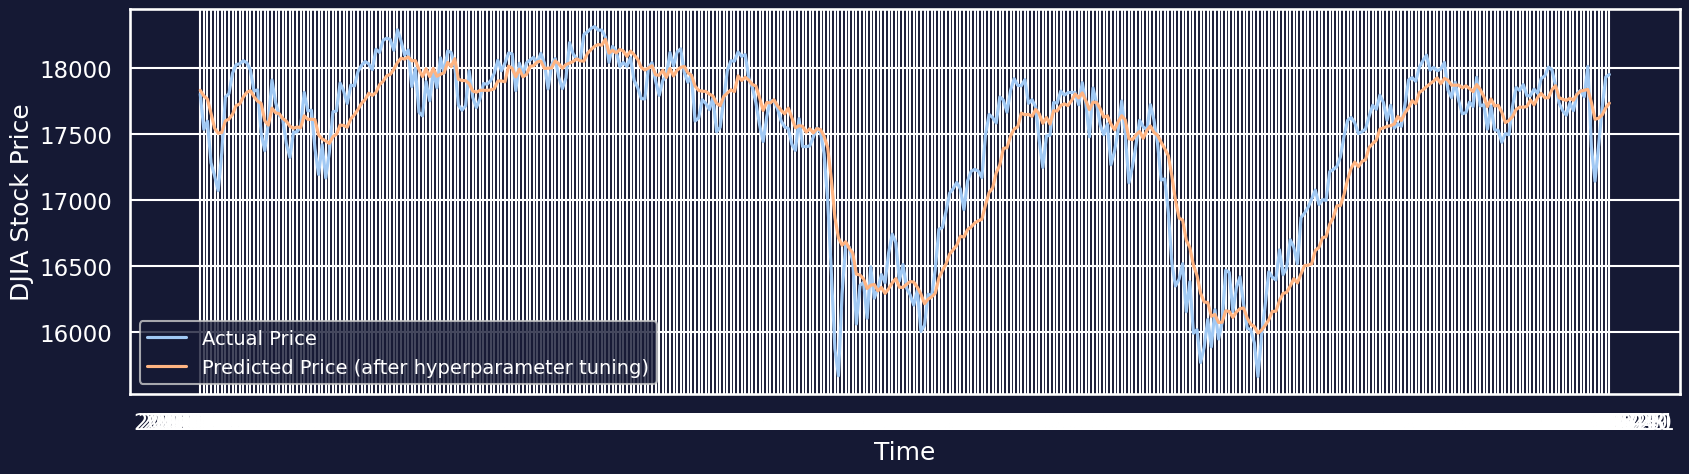

mae           mse  \
naive_model                                        125.681572  27671.523438   
Keras_Sequential_results                           134.296310  32268.914062   
CNN_results                                        129.549988  31140.451172   
GPT Model                                          187.358459  58118.000000   
BERT + dense Model (before hyperparameter tuning)  194.305557  62116.722656   
BERT + dense Model (after hyperparameter tuning)   178.802261  53846.593750   

                                                         rmse      mape  \
naive_model                                        166.347595  0.728094   
Keras_Sequential_results                           179.635498  0.778741   
CNN_results                                        176.466568  0.751833   
GPT Model                                          241.076752  1.077831   
BERT + dense Model (before hyperparameter tuning)  249.232269  1.121808   
BERT + dense Model (after hyperparameter tuning)   232.048691  1.035383   

                                                       mase  
naive_model                                        0.998652  
Keras_Sequential_results                           1.066684  
CNN_results                                        1.028985  
GPT Model                                          1.485903  
BERT + dense Model (before hyperparameter tuning)  1.540999  
BERT + dense Model (after hyperparameter tuning)   1.418045

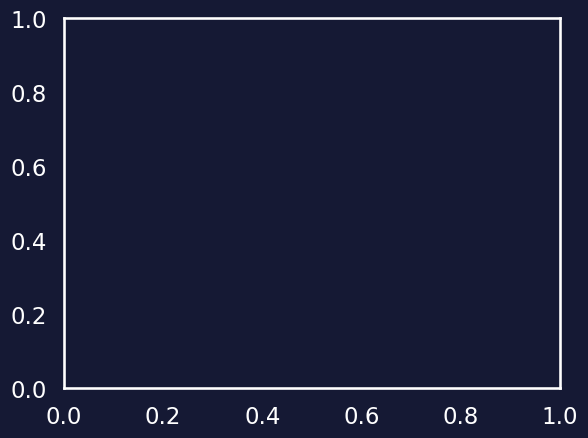

In [ ]:
# prompt: write code from here for low mae change hyperparameter and learning rate

# Tune learning rate
learning_rate = 0.0000005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 1024
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 60
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results_after = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results_after)

# Compare model results before and after hyperparameter tuning
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results,
                              "BERT + dense Model (before hyperparameter tuning)": BERT_dense_model_results,
                              "BERT + dense Model (after hyperparameter tuning)": BERT_dense_model_results_after}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price (after hyperparameter tuning)")
plt.show()
plt.grid(False)

model_results



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 725s 725s/step - loss: 33164.0430 - mae: 137.2805 - val_loss: 37800.0898 - val_mae: 149.5459
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 33163.3320 - mae: 137.2958 - val_loss: 37820.5586 - val_mae: 149.6064
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 33162.6289 - mae: 137.3111 - val_loss: 37841.0039 - val_mae: 149.6669
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 33161.9609 - mae: 137.3268 - val_loss: 37861.3633 - val_mae: 149.7268
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 33161.3359 - mae: 137.3424 - val_loss: 37881.5898 - val_mae: 149.7871
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 33160.7539 - mae: 137.3579 - val_loss: 37901.3633 - val_mae: 149.8461
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 33160.1953 - mae: 137.3730 - val_loss: 37920.9141 - val_mae: 149.9041
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 33159.6836 - mae: 137.3878 - val_loss: 37939.9570 - val_mae: 149.9

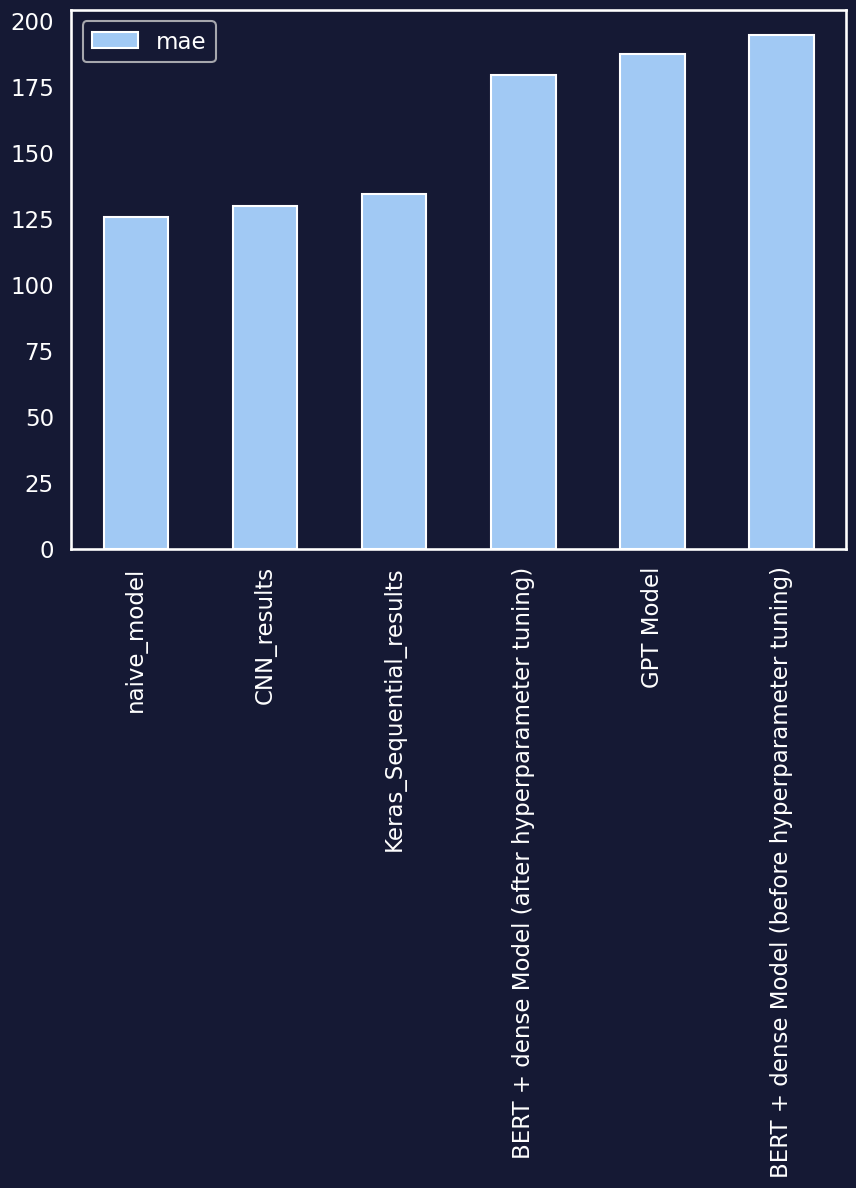

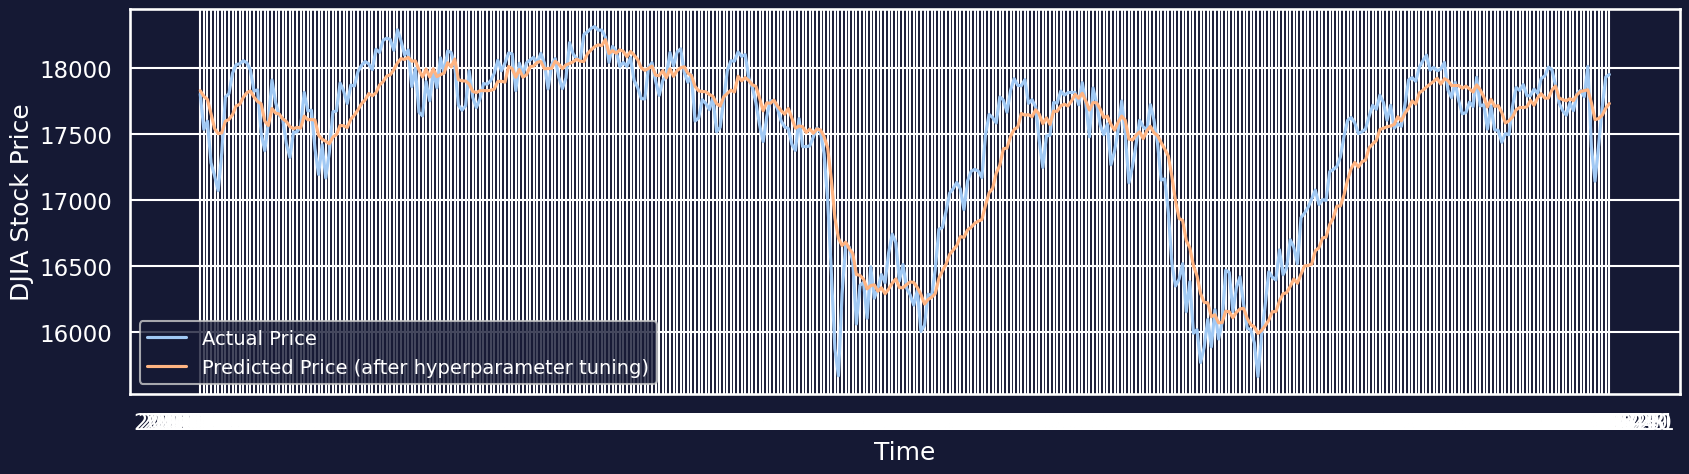

mae           mse  \
naive_model                                        125.681572  27671.523438   
Keras_Sequential_results                           134.296310  32268.914062   
CNN_results                                        129.549988  31140.451172   
GPT Model                                          187.358459  58118.000000   
BERT + dense Model (before hyperparameter tuning)  194.305557  62116.722656   
BERT + dense Model (after hyperparameter tuning)   179.133163  53980.628906   

                                                         rmse      mape  \
naive_model                                        166.347595  0.728094   
Keras_Sequential_results                           179.635498  0.778741   
CNN_results                                        176.466568  0.751833   
GPT Model                                          241.076752  1.077831   
BERT + dense Model (before hyperparameter tuning)  249.232269  1.121808   
BERT + dense Model (after hyperparameter tuning)   232.337311  1.037134   

                                                       mase  
naive_model                                        0.998652  
Keras_Sequential_results                           1.066684  
CNN_results                                        1.028985  
GPT Model                                          1.485903  
BERT + dense Model (before hyperparameter tuning)  1.540999  
BERT + dense Model (after hyperparameter tuning)   1.420670

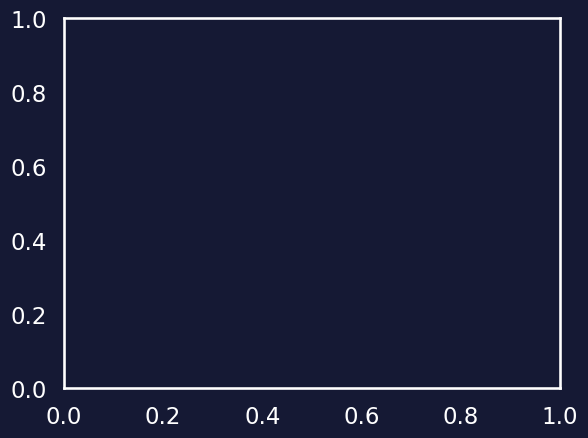

In [ ]:
# prompt: write code from here for low mae change hyperparameter and learning rate foe below 100 mae

# Tune learning rate
learning_rate = 0.0000001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 2048
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 70
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results_after = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
print(BERT_dense_model_results_after)

# Compare model results before and after hyperparameter tuning
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Keras_Sequential_results": Keras_Sequential_Model_results,
                              "CNN_results": CNN_model_results,
                              "GPT Model": gpt_model_results,
                              "BERT + dense Model (before hyperparameter tuning)": BERT_dense_model_results,
                              "BERT + dense Model (after hyperparameter tuning)": BERT_dense_model_results_after}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price (after hyperparameter tuning)")
plt.show()
plt.grid(False)

model_results
